In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from scipy import stats


%matplotlib inline
# unicode minusÎ•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ∏∞ ÏúÑÌïú ÏÑ§Ï†ï (minus Íπ®ÏßêÌòÑÏÉÅ Î∞©ÏßÄ)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

## Îç∞Ïù¥ÌÑ∞ÏÖã

In [2]:
reviews_3527 = pd.read_csv("data/reviews_3527.csv")
reviews_3527_4176 = pd.read_csv("data/reviews_3527_4176.csv")
reviews_4176_8352 = pd.read_csv("data/reviews_4176_8352.csv")
reviews_8352 = pd.read_csv("data/reviews_8352.csv")

In [3]:
# Î™®Î≤îÏãùÎãπÏù∏ Í≤ÉÏùÄ 1, Î™®Î≤îÏãùÎãπÏù¥ ÏïÑÎãå Í≤ÉÏùÄ 0ÏúºÎ°ú mapping
reviews_3527['is_model_b'] = reviews_3527['is_model'].map({np.nan: 0, 'Î™®Î≤îÏãùÎãπÏßÄÏ†ï': 1})
reviews_3527_4176['is_model_b'] = reviews_3527_4176['is_model'].map({np.nan: 0, 'Î™®Î≤îÏãùÎãπÏßÄÏ†ï': 1})

## Ï†ÑÏ≤òÎ¶¨

In [4]:
reviews = pd.concat((reviews_3527, reviews_3527_4176, reviews_4176_8352, reviews_8352), sort = False)

In [5]:
def data_preprocessing(data):

    # Î¶¨Î∑∞ ÎÇ¥Ïö© Ïú†Î¨¥ Îã¥ÏùÄ binary Ïª¨Îüº ÏÉùÏÑ±
    data['is_review'] = (data['review'].notnull()).astype("int")

    # ÌèâÏ†ê Ìé∏Ìñ• Ï†úÍ±∞
    data['adjusted_rate'] = data['rate'] / data['avg_rate']
    return data

In [6]:
reviews = data_preprocessing(reviews)

In [7]:
reviews.head(3)

name   user                                             review  \
0  Î∏åÎûòÏÑúÎ¶¨  Navio  Í∞ïÎÇ®Ïóê ÏûàÎäî ÎπÑÏã∏Í≥† Ï¢ãÎã§Îäî Ìò∏ÌÖî Î∑îÌéòÎì§ Í∞ÄÎ¥§ÎäîÎç∞ Ïó¨Í∏∞Í∞Ä Ï†úÏùº Í¥úÏ∞ÆÎÑ§Ïöî. Ï¢ÖÎ•òÎèÑ ÎßéÍ≥†...   
1  Î∏åÎûòÏÑúÎ¶¨  Chris  ÎßõÏûàÎäî Ï†ÄÎÖÅ Î®πÏóàÏñ¥Ïöî. Í∞ÄÏùÑÎ∂ÄÌÑ∞ 1ÎÖÑÍ∞Ñ Î¶¨Î™®Îç∏ÎßÅ Îì§Ïñ¥Í∞ÄÎãà, Í∑∏ Ï†ÑÏóê Ìïú Î≤à Îçî Í∞ÄÏïº...   
2  Î∏åÎûòÏÑúÎ¶¨  Íµ¨Î¶¨Î¶¨Î¶¨Î¶¨  ÏÇºÏÑ±Ïó≠ Ìò∏ÌÖî Î∑îÌéòÏ§ë Ïó¨Í∏∞Í∞Ä Ï†úÏùº ÎßåÏ°±! Ï†êÏã¨ Ï†ÄÎÖÅ ÎëòÎã§ Î®πÏñ¥Î¥§ÎäîÎç∞ Î©îÎâ¥Í∞Ä ÏïÑÏâΩÏßÄÎèÑ ...   

          date  rate  avg_rate  review_cnt is_model  is_model_b  Unnamed: 0  \
0  2024.04.15.     4       2.5           2   Î™®Î≤îÏãùÎãπÏßÄÏ†ï           1         NaN   
1  2024.03.01.     4       2.3          22   Î™®Î≤îÏãùÎãπÏßÄÏ†ï           1         NaN   
2  2023.12.20.     5       4.1          35   Î™®Î≤îÏãùÎãπÏßÄÏ†ï           1         NaN   

  new_name  is_review  adjusted_rate  
0      NaN          1       1.600000  
1      NaN          1       1.739130  
2      NaN          1       1.219512

In [8]:
def grouping(data, n_review_cnt_under=0):
    # 1 rate adjusting 
    # data['adjusted_rate'] = data['rate'] / data['avg_rate']
    
    # delete restaurants with reviews less than n
    temp = data.groupby(["name", "is_model_b"]).agg({"adjusted_rate":["count", stats.gmean]})

    dataset = temp[temp["adjusted_rate"]["count"] > n_review_cnt_under]
    dataset = dataset.droplevel(level=0, axis=1)
    dataset.columns = ['review_cnt', 'rate_gmean']
    
    return dataset

In [9]:
reviews_model = reviews[reviews['is_model'] == "Î™®Î≤îÏãùÎãπÏßÄÏ†ï"]
reviews_no_model = reviews[reviews['is_model'] != "Î™®Î≤îÏãùÎãπÏßÄÏ†ï"]

In [10]:
# Î¶¨Î∑∞ Í∞úÏàò Ï†úÌïú (ex. 10Í∞ú Ïù¥ÏÉÅ)
review_cnt = 10

reviews_group = grouping(reviews, review_cnt).reset_index()
reviews_group_model = grouping(reviews_model, review_cnt).reset_index()
reviews_group_no_model = grouping(reviews_no_model, review_cnt).reset_index()

In [11]:
reviews_group

name  is_model_b  review_cnt  rate_gmean
0           Î≥¥ÏΩîÏÑúÏö∏Í∞ïÎÇ®           0          18    0.999651
1             ÌÉÄÏõåÍ∑∏Ïïà           0          20    0.770020
2     (Ï£º)Í∞êÏÑ±ÌÉÄÏΩî Í∞ïÎÇ®Ïó≠Ï†ê           0         142    0.800114
3         (Ï£º)ÎÇôÌÉÄÎ∏åÎ£®Ïûâ           0          22    0.841082
4         (Ï£º)ÎçîÌú¥Ïª®Î≤§ÏÖò           0          12    0.732029
...            ...         ...         ...         ...
2230          ÌûàÎÖ∏Ïπ¥Ï∏†           0          50    1.112072
2231           ÌûàÎùºÏù¥           0          12    0.739857
2232          ÌûàÎ°úÏïÑÌÇ§           0          20    1.222931
2233           ÌûàÎ°úÏïº           0          23    0.974868
2234           ÌûàÏπ¥Î¶¨           0          20    0.912564

[2235 rows x 4 columns]

In [12]:
reviews.shape, reviews_group.shape, reviews_group_model.shape, reviews_group_no_model.shape

((97992, 13), (2235, 4), (164, 4), (2071, 4))

In [13]:
# Î¶¨Î∑∞ Í∞úÏàò Ï†úÌïúÌïú ÏùåÏãùÏ†ê Î™©Î°ùÏùÑ Î∞îÌÉïÏúºÎ°ú, reviews Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌïÑÌÑ∞ÎßÅ
reviews = reviews[reviews.name.isin(reviews_group["name"])]
reviews.shape

(82583, 13)

In [14]:
reviews.head(3)

name   user                                             review  \
0  Î∏åÎûòÏÑúÎ¶¨  Navio  Í∞ïÎÇ®Ïóê ÏûàÎäî ÎπÑÏã∏Í≥† Ï¢ãÎã§Îäî Ìò∏ÌÖî Î∑îÌéòÎì§ Í∞ÄÎ¥§ÎäîÎç∞ Ïó¨Í∏∞Í∞Ä Ï†úÏùº Í¥úÏ∞ÆÎÑ§Ïöî. Ï¢ÖÎ•òÎèÑ ÎßéÍ≥†...   
1  Î∏åÎûòÏÑúÎ¶¨  Chris  ÎßõÏûàÎäî Ï†ÄÎÖÅ Î®πÏóàÏñ¥Ïöî. Í∞ÄÏùÑÎ∂ÄÌÑ∞ 1ÎÖÑÍ∞Ñ Î¶¨Î™®Îç∏ÎßÅ Îì§Ïñ¥Í∞ÄÎãà, Í∑∏ Ï†ÑÏóê Ìïú Î≤à Îçî Í∞ÄÏïº...   
2  Î∏åÎûòÏÑúÎ¶¨  Íµ¨Î¶¨Î¶¨Î¶¨Î¶¨  ÏÇºÏÑ±Ïó≠ Ìò∏ÌÖî Î∑îÌéòÏ§ë Ïó¨Í∏∞Í∞Ä Ï†úÏùº ÎßåÏ°±! Ï†êÏã¨ Ï†ÄÎÖÅ ÎëòÎã§ Î®πÏñ¥Î¥§ÎäîÎç∞ Î©îÎâ¥Í∞Ä ÏïÑÏâΩÏßÄÎèÑ ...   

          date  rate  avg_rate  review_cnt is_model  is_model_b  Unnamed: 0  \
0  2024.04.15.     4       2.5           2   Î™®Î≤îÏãùÎãπÏßÄÏ†ï           1         NaN   
1  2024.03.01.     4       2.3          22   Î™®Î≤îÏãùÎãπÏßÄÏ†ï           1         NaN   
2  2023.12.20.     5       4.1          35   Î™®Î≤îÏãùÎãπÏßÄÏ†ï           1         NaN   

  new_name  is_review  adjusted_rate  
0      NaN          1       1.600000  
1      NaN          1       1.739130  
2      NaN          1       1.219512

In [15]:
reviews.isnull().sum()

name                 0
user                64
review           14902
date                 0
rate                 0
avg_rate             0
review_cnt           0
is_model         75135
is_model_b           0
Unnamed: 0       39535
new_name         39535
is_review            0
adjusted_rate        0
dtype: int64

## Í∞ÄÏÑ§ Í≤ÄÏ†ï

### 1. Î¶¨Î∑∞ ÏóÜÏù¥ Î≥ÑÏ†êÎßå Îß§Í∏¥ ÏÇ¨ÎûåÍ≥º Î¶¨Î∑∞Î•º Ï†ÅÏùÄ ÏÇ¨ÎûåÏùò ÌèâÍ∑† ÌèâÏ†êÏù¥ Ï∞®Ïù¥Í∞Ä ÏûàÏùÑÍπå?
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Î¶¨Î∑∞ ÏóÜÏù¥ Î≥ÑÏ†êÎßå Îß§Í∏¥ ÏÇ¨ÎûåÍ≥º Î¶¨Î∑∞Î•º Ï†ÅÏùÄ ÏÇ¨ÎûåÏùò ÌèâÍ∑† ÌèâÏ†êÏù¥ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§

- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Î¶¨Î∑∞ ÏóÜÏù¥ Î≥ÑÏ†êÎßå Îß§Í∏¥ ÏÇ¨ÎûåÍ≥º Î¶¨Î∑∞Î•º Ï†ÅÏùÄ ÏÇ¨ÎûåÏùò ÌèâÍ∑† ÌèâÏ†êÏù¥ Ï∞®Ïù¥Í∞Ä ÏûàÎã§

#### Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï

In [20]:
def normal_check(data, column='rate_gmean'):

    # ÌëúÎ≥∏Ïù¥ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Kolmogorov-Smirnov Í≤ÄÏ†ï ÏÇ¨Ïö©
    # https://datadoctorblog.com/2023/10/12/Py-Stat-Test-Normality/

    # kolmogorov-Smirnov Í≤ÄÏ†ï (kstest)ÏóêÏÑú p-value=0 ÏùºÎïå Ìï¥Í≤∞Ï±Ö
    # https://stackoverflow.com/questions/46678239/p-value-is-0-when-i-use-scipy-stats-kstest-for-large-dataset
    # -> stats.kstest(data[column], "norm", arges(data[column].mean(), data[column].var()**0.5)) ÏôÄ ÎèôÏùº

    # loc, scale = stats.norm.fit(data[column])
    # n = stats.norm(loc=loc, scale=scale)

    # kolmogorov-Smirnov Í≤ÄÏ†ï ÏÇ¨Ïö©
    # statistic, p_value = stats.kstest(data[column], n.cdf)
    # print("kolmogorov-Smirnov ÌÜµÍ≥ÑÎüâ:", statistic)
    
    
    # Anderson-Darling Í≤ÄÏ†ï ÏÇ¨Ïö©

    # Ï∞∏Í≥† ÎßÅÌÅ¨
    # - https://stackoverflow.com/questions/7903977/implementing-a-kolmogorov-smirnov-test-in-python-scipy
    # - https://datadoctorblog.com/2023/10/12/Py-Stat-Test-Normality/
    # - https://dibrary.tistory.com/61

    statistics, critical_values, significance_level = stats.anderson(data[column], dist="norm")
    anderson_result = pd.DataFrame([critical_values, significance_level]).transpose()
    anderson_result.columns = ["critical_values", "significance_level"]
    anderson_result["reject"] = anderson_result["critical_values"] < statistics

    print("Anderson-Darling Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ:", statistics)
    if anderson_result.loc[2, "reject"]:
        print(f"Anderson-Darling Í≤ÄÏ†ïÍ≤∞Í≥º : Ïú†ÏùòÏàòÏ§Ä {anderson_result.loc[2, 'significance_level']}ÏóêÏÑú Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ {statistics}Ïù¥ Í∏∞Í∞ÅÏó≠ {anderson_result.loc[2, 'critical_values']} Î≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäîÎã§")
    else:
        print("Anderson-Darling Í≤ÄÏ†ïÍ≤∞Í≥º : 5% Ïú†ÏùòÏàòÏ§ÄÏóêÏÑú Ï†ïÍ∑úÏÑ± ÎßåÏ°±")
    
    # return anderson_result

In [37]:
# Î¶¨Î∑∞Í∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ÏôÄ Î¶¨Î∑∞Í∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞Î°ú ÎÇòÎààÎã§
no_review = reviews[reviews.is_review == 0]
yes_review = reviews[reviews.is_review == 1]

In [33]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã
normal_check(reviews, "adjusted_rate")

Anderson-Darling Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ: 2104.9934582749265
Anderson-Darling Í≤ÄÏ†ïÍ≤∞Í≥º : Ïú†ÏùòÏàòÏ§Ä 5.0ÏóêÏÑú Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ 2104.9934582749265Ïù¥ Í∏∞Í∞ÅÏó≠ 0.787 Î≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäîÎã§


In [40]:
# Î¶¨Î∑∞Í∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞
normal_check(yes_review, "adjusted_rate")


Anderson-Darling Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ: 1699.6903348277701
Anderson-Darling Í≤ÄÏ†ïÍ≤∞Í≥º : Ïú†ÏùòÏàòÏ§Ä 5.0ÏóêÏÑú Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ 1699.6903348277701Ïù¥ Í∏∞Í∞ÅÏó≠ 0.787 Î≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäîÎã§


In [39]:
# Î¶¨Î∑∞Í∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞
normal_check(no_review, "adjusted_rate")

Anderson-Darling Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ: 392.73614494886715
Anderson-Darling Í≤ÄÏ†ïÍ≤∞Í≥º : Ïú†ÏùòÏàòÏ§Ä 5.0ÏóêÏÑú Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ 392.73614494886715Ïù¥ Í∏∞Í∞ÅÏó≠ 0.787 Î≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäîÎã§


In [60]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ (not grouped) QQ Plot
# Ï†ïÍ∑úÏÑ±ÏùÑ ÎùÑÏßÄ ÏïäÎäîÎã§

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

stats.probplot(reviews["adjusted_rate"], dist=stats.norm, plot=ax1)
stats.probplot(yes_review["adjusted_rate"], dist=stats.norm, plot=ax2)
stats.probplot(no_review["adjusted_rate"], dist=stats.norm, plot=ax3)

ax1.set_title("Ï†ÑÏ≤¥ Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† ÌèâÏ†ê QQ Plot")
ax2.set_title("Î¶¨Î∑∞Í∞Ä Ï†ÅÌûå Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† ÌèâÏ†ê QQ Plot")
ax3.set_title("Î¶¨Î∑∞Í∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† ÌèâÏ†ê QQ Plot")

plt.tight_layout()
plt.show()

#### ÎπÑÎ™®ÏàòÏ†Å Í≤ÄÏ†ï

In [36]:
def non_parametic_check(df1, df2, column):
    
    # Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(df1[column], df2[column])

    print("Mann-Whitney U test ÌÜµÍ≥ÑÎüâ:", statistic)
    print("p-value:", p_value)
    if p_value < 0.05:
        print("Í≤ÄÏ†ïÍ≤∞Í≥º : Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïúÎã§")
    else:
        print("Í≤ÄÏ†ïÍ≤∞Í≥º : 5% Ïú†ÏùòÏàòÏ§ÄÏóêÏÑú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌïúÎã§")

In [41]:
# Mann-Whitney ÌÖåÏä§Ìä∏ Ï†ÅÏö©
non_parametic_check(no_review, yes_review, "adjusted_rate")

Mann-Whitney U test ÌÜµÍ≥ÑÎüâ: 535078892.0
p-value: 7.225414966041926e-32
Í≤ÄÏ†ïÍ≤∞Í≥º : Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïúÎã§


In [ ]:
sns.histplot(data=over_10, x=("reg_rate", "gmean"), kde=True)
plt.axvline(stats.gmean(over_10["reg_rate"]["gmean"]), color="r")
# plt.xticks([np.median(over_10["reg_rate"]["mean"])])
plt.xticks([stats.gmean(over_10["reg_rate"]["gmean"])])

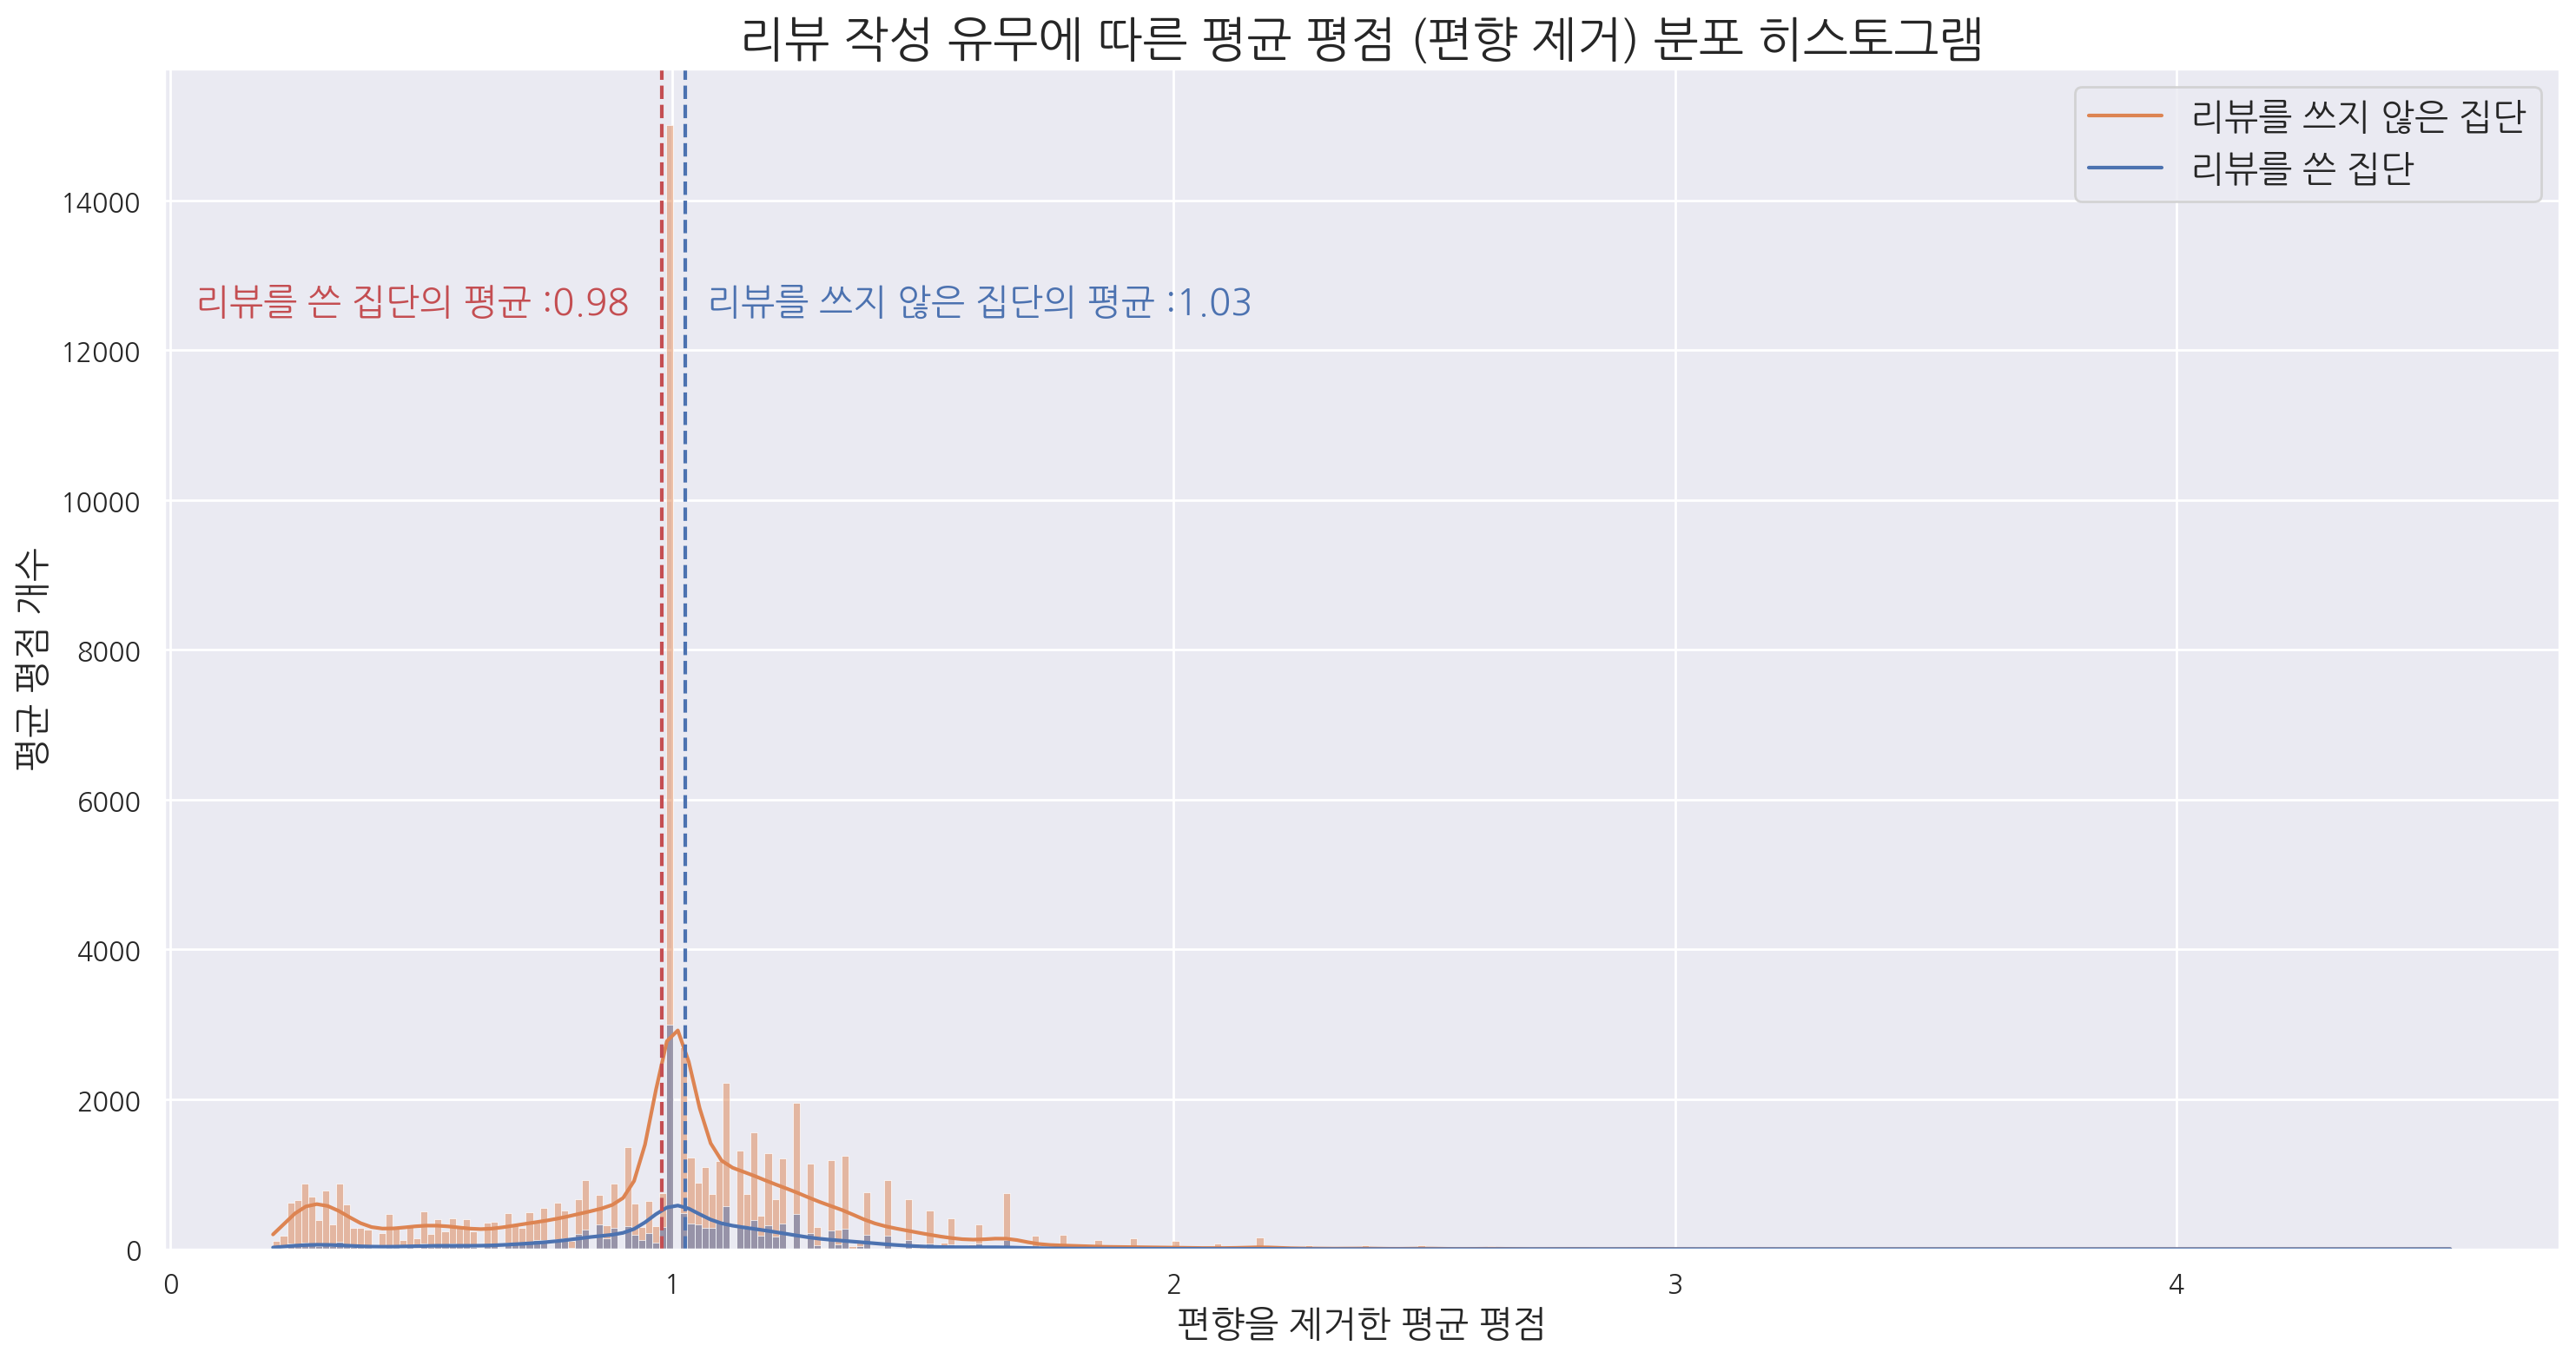

In [113]:
# Î¶¨Î∑∞Î•º Ïì¥ ÏßëÎã®Í≥º Ïì∞ÏßÄ ÏïäÏùÄ ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†ê Î∂ÑÌè¨ ÎπÑÍµê
plt.figure(figsize=(15, 8))
sns.histplot(data=reviews, x="adjusted_rate", hue="is_review", kde=True)

plt.axvline(np.mean(no_review["adjusted_rate"]), color="b", linestyle="--")
plt.axvline(np.mean(yes_review["adjusted_rate"]), color="r", linestyle="--")

plt.text(0.05, 12500, "Î¶¨Î∑∞Î•º Ïì¥ ÏßëÎã®Ïùò ÌèâÍ∑† :"+str(round(np.mean(yes_review["adjusted_rate"]),2)), 
         color="r", size=15, 
        #  weight="bold"
         )
plt.text(1.07, 12500, "Î¶¨Î∑∞Î•º Ïì∞ÏßÄ ÏïäÏùÄ ÏßëÎã®Ïùò ÌèâÍ∑† :"+str(round(np.mean(no_review["adjusted_rate"]),2)), 
         color="b", size=15, 
        #  weight="bold"
         )

plt.legend(("Î¶¨Î∑∞Î•º Ïì∞ÏßÄ ÏïäÏùÄ ÏßëÎã®", "Î¶¨Î∑∞Î•º Ïì¥ ÏßëÎã®"), 
        #    prop={'weight':'bold'}
           )
plt.rc("legend", fontsize=15)


plt.xlabel("Ìé∏Ìñ•ÏùÑ Ï†úÍ±∞Ìïú ÌèâÍ∑† ÌèâÏ†ê", size=15)
plt.ylabel("ÌèâÍ∑† ÌèâÏ†ê Í∞úÏàò", size=15)

plt.title("Î¶¨Î∑∞ ÏûëÏÑ± Ïú†Î¨¥Ïóê Îî∞Î•∏ ÌèâÍ∑† ÌèâÏ†ê (Ìé∏Ìñ• Ï†úÍ±∞) Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®", size=20)

plt.tight_layout()
plt.show()

##### Í∞ÄÏÑ§ Í≤ÄÏ†ï Í≤∞Î°†
- p-value < 0.05 : Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å

    - Î¶¨Î∑∞Î•º Ïì¥ ÏßëÎã®Í≥º Ïì∞ÏßÄ ÏïäÏùÄ ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†êÏóêÎäî Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï† Ïàò ÏûàÎã§
    
    - Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÎã§

### 2. Î¶¨Î∑∞ Í∞úÏàòÎäî ÌèâÍ∑† ÌèâÏ†êÍ≥º Ïó∞Í¥ÄÏù¥ ÏûàÏùÑÍπå?
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Î¶¨Î∑∞ Í∞úÏàòÏùò Ï§ëÏúÑÍ∞íÎ≥¥Îã§ Î¶¨Î∑∞Î•º Ï†ÅÍ≤å Ïì∞Îäî ÏßëÎã®Í≥º ÎßéÏù¥ Ïì∞Îäî ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥Í∞Ä ÏóÜÎã§

- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Î¶¨Î∑∞ Í∞úÏàòÏùò Ï§ëÏúÑÍ∞íÎ≥¥Îã§ Î¶¨Î∑∞Î•º Ï†ÅÍ≤å Ïì∞Îäî ÏßëÎã®Í≥º ÎßéÏù¥ Ïì∞Îäî ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥Í∞Ä ÏûàÎã§

In [57]:
# Ï§ëÏúÑÍ∞í ÌôïÏù∏
reviews.describe()

rate      avg_rate    review_cnt    is_model_b    Unnamed: 0  \
count  82583.000000  82583.000000  82583.000000  82583.000000  43048.000000   
mean       3.809803      3.855115    164.172239      0.090188  24792.072710   
std        1.476035      0.943638    650.634927      0.286453  14306.427146   
min        1.000000      1.000000      1.000000      0.000000      3.000000   
25%        3.000000      3.400000      7.000000      0.000000  12429.750000   
50%        4.000000      4.000000     30.000000      0.000000  24701.500000   
75%        5.000000      4.600000    106.000000      0.000000  37081.250000   
max        5.000000      5.000000   8538.000000      1.000000  49956.000000   

          is_review  adjusted_rate  
count  82583.000000   82583.000000  
mean       0.819551       0.987788  
std        0.384563       0.350135  
min        0.000000       0.204082  
25%        1.000000       0.857143  
50%        1.000000       1.000000  
75%        1.000000       1.162791  
max        1.000000       4.545455

#### Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï
- `normal_check` Ìï®Ïàò ÏÇ¨Ïö©

In [53]:
less_median = reviews[reviews["review_cnt"] < np.median(reviews["review_cnt"])]
more_median = reviews[reviews["review_cnt"] >= np.median(reviews["review_cnt"])]

In [55]:
normal_check(less_median, "adjusted_rate")

Anderson-Darling Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ: 1898.3711953345774
Anderson-Darling Í≤ÄÏ†ïÍ≤∞Í≥º : Ïú†ÏùòÏàòÏ§Ä 5.0ÏóêÏÑú Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ 1898.3711953345774Ïù¥ Í∏∞Í∞ÅÏó≠ 0.787 Î≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäîÎã§


In [56]:
normal_check(more_median, "adjusted_rate")

Anderson-Darling Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ: 575.4101656285638
Anderson-Darling Í≤ÄÏ†ïÍ≤∞Í≥º : Ïú†ÏùòÏàòÏ§Ä 5.0ÏóêÏÑú Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ 575.4101656285638Ïù¥ Í∏∞Í∞ÅÏó≠ 0.787 Î≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäîÎã§


#### ÎπÑÎ™®ÏàòÏ†Å Í≤ÄÏ†ï

- Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•¥ÏßÄ ÏïäÎäî Í≤É ÌôïÏù∏

- Îî∞ÎùºÏÑú, ÎπÑÎ™®ÏàòÏ†Å Í≤ÄÏ†ï ÏãúÌñâ

In [54]:
non_parametic_check(less_median, more_median, "adjusted_rate")

Mann-Whitney U test ÌÜµÍ≥ÑÎüâ: 804270394.0
p-value: 2.1734039468192244e-45
Í≤ÄÏ†ïÍ≤∞Í≥º : Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïúÎã§


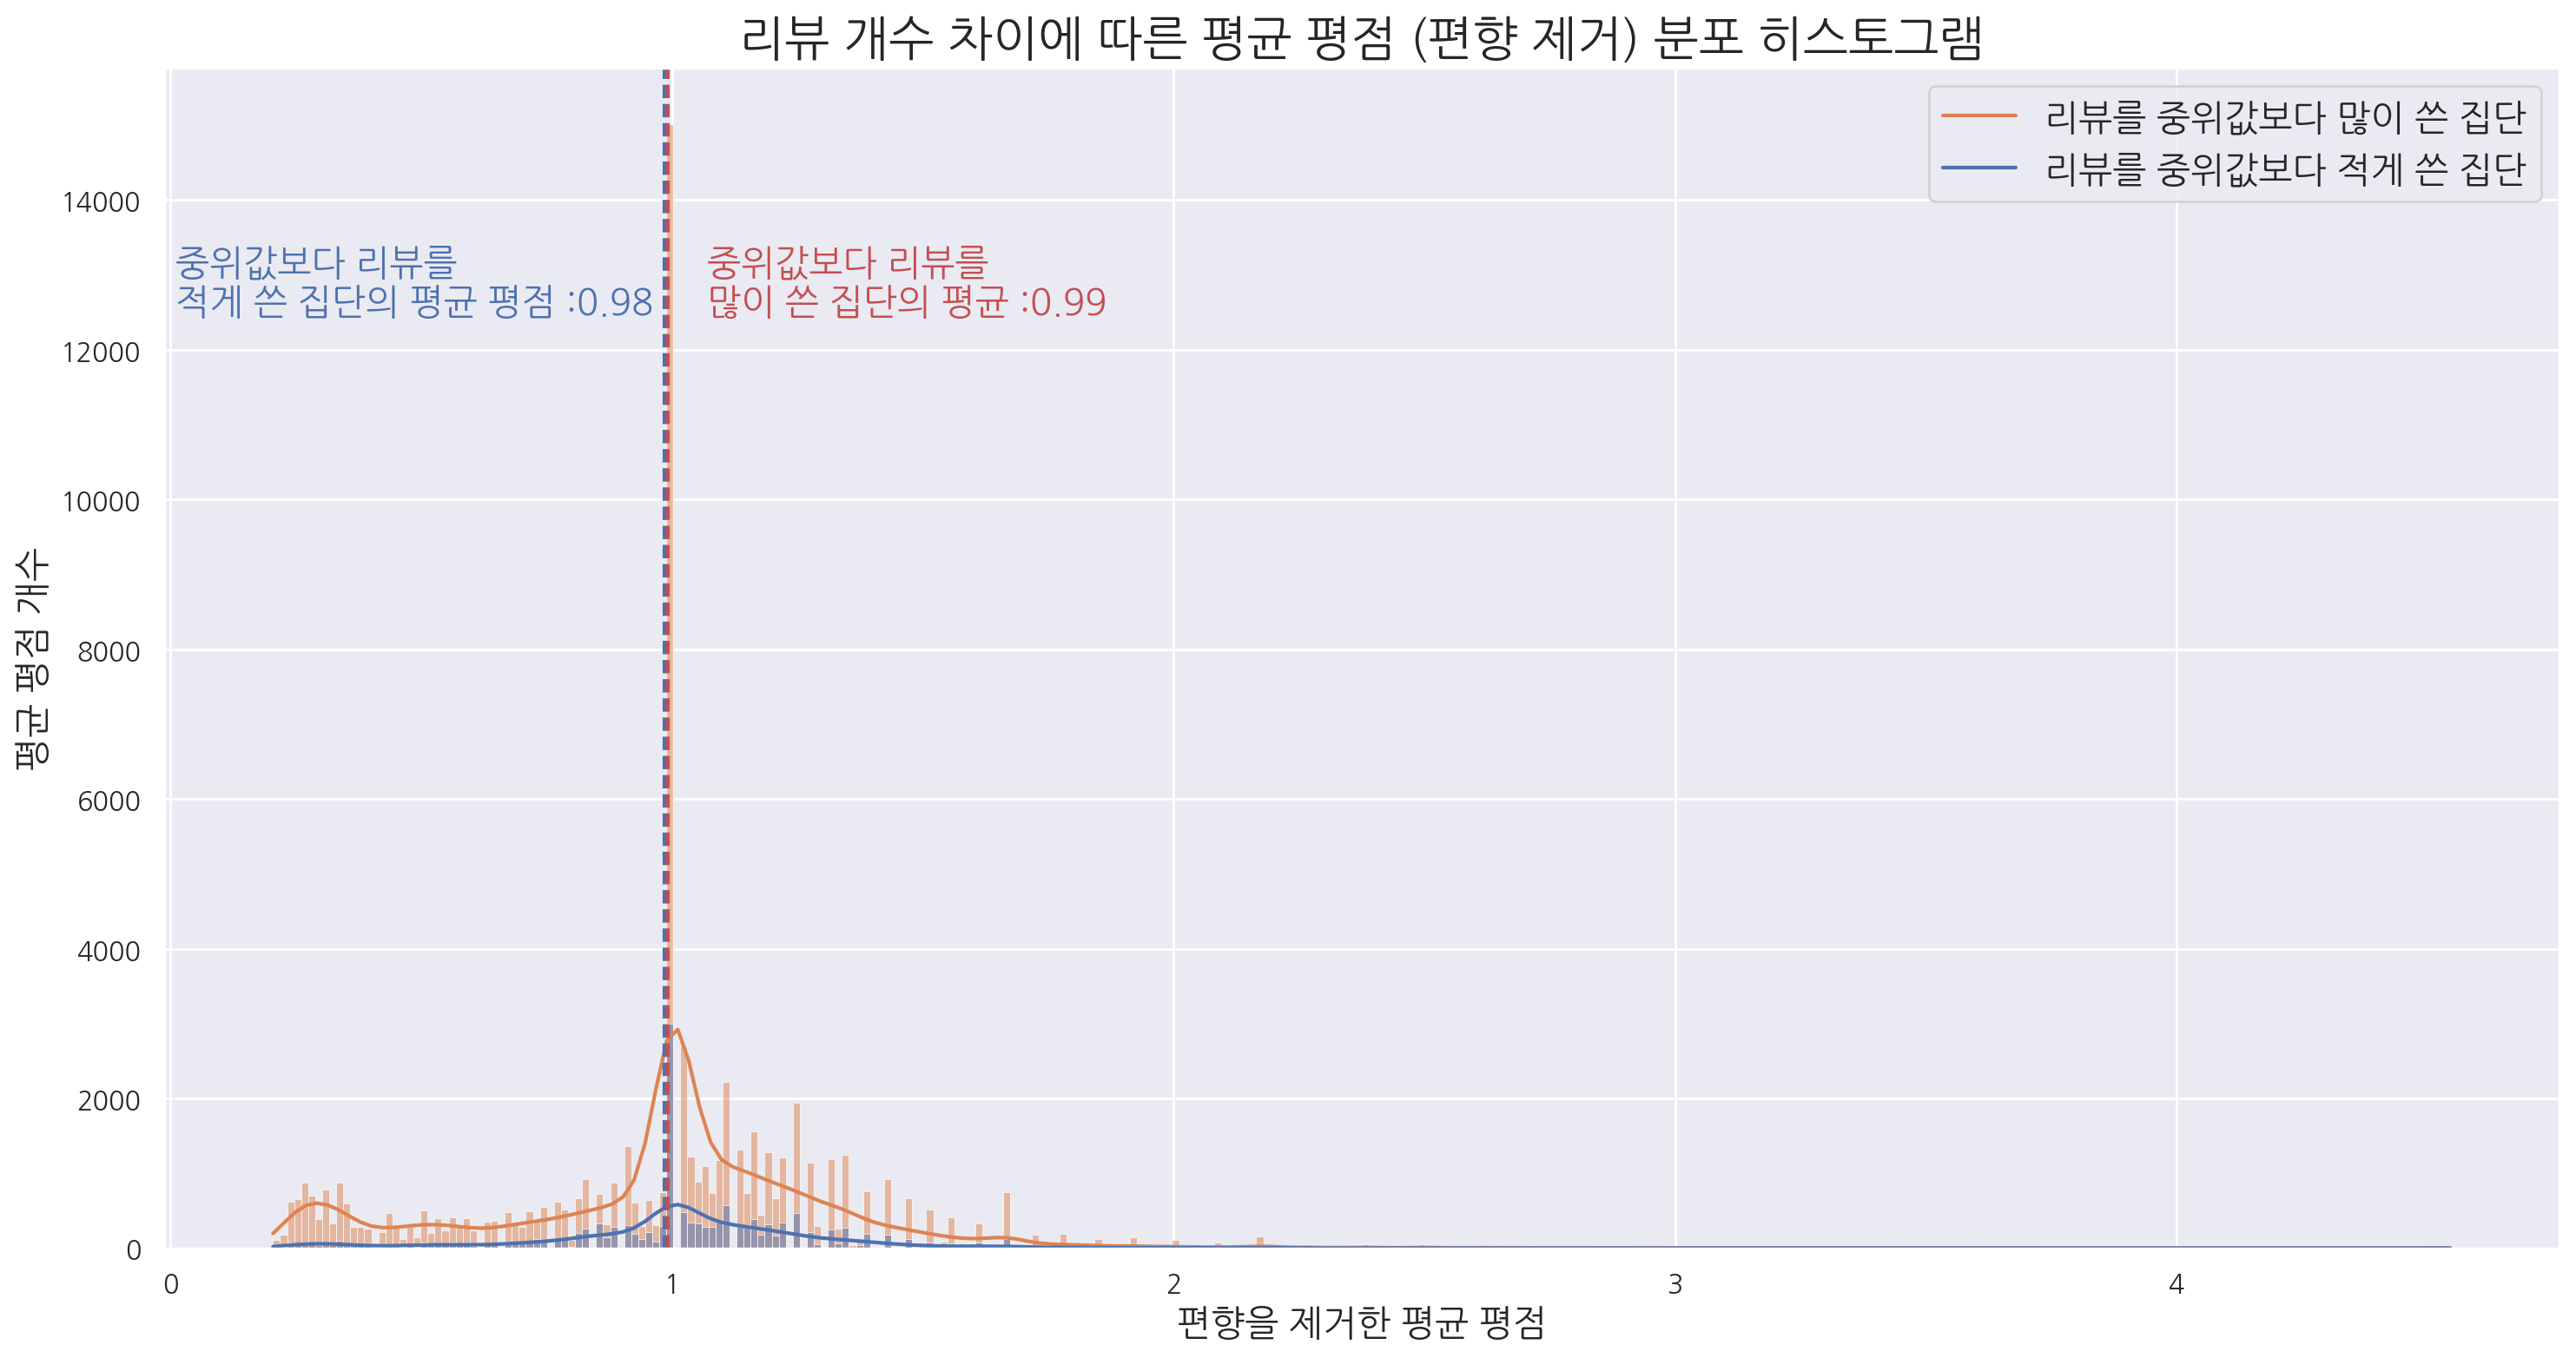

In [120]:
# Î¶¨Î∑∞Î•º Ïì¥ ÏßëÎã®Í≥º Ïì∞ÏßÄ ÏïäÏùÄ ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†ê Î∂ÑÌè¨ ÎπÑÍµê
plt.figure(figsize=(15, 8))
sns.histplot(data=reviews, x="adjusted_rate", hue="is_review", kde=True)

plt.axvline(np.mean(less_median["adjusted_rate"]), color="b", linestyle="--")
plt.axvline(np.mean(more_median["adjusted_rate"]), color="r", linestyle="--")

plt.text(0.01, 12500, "Ï§ëÏúÑÍ∞íÎ≥¥Îã§ Î¶¨Î∑∞Î•º \nÏ†ÅÍ≤å Ïì¥ ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†ê :"+str(round(np.mean(less_median["adjusted_rate"]),2)), 
         color="b", size=15, 
        #  weight="bold"
         )

plt.text(1.07, 12500, "Ï§ëÏúÑÍ∞íÎ≥¥Îã§ Î¶¨Î∑∞Î•º\nÎßéÏù¥ Ïì¥ ÏßëÎã®Ïùò ÌèâÍ∑† :"+str(round(np.mean(more_median["adjusted_rate"]),2)), 
         color="r", size=15, 
        #  weight="bold"
         )


plt.legend(("Î¶¨Î∑∞Î•º Ï§ëÏúÑÍ∞íÎ≥¥Îã§ ÎßéÏù¥ Ïì¥ ÏßëÎã®", "Î¶¨Î∑∞Î•º Ï§ëÏúÑÍ∞íÎ≥¥Îã§ Ï†ÅÍ≤å Ïì¥ ÏßëÎã®"), 
        #    prop={'weight':'bold'}
           )
plt.rc("legend", fontsize=15)


plt.xlabel("Ìé∏Ìñ•ÏùÑ Ï†úÍ±∞Ìïú ÌèâÍ∑† ÌèâÏ†ê", size=15)
plt.ylabel("ÌèâÍ∑† ÌèâÏ†ê Í∞úÏàò", size=15)

plt.title("Î¶¨Î∑∞ Í∞úÏàò Ï∞®Ïù¥Ïóê Îî∞Î•∏ ÌèâÍ∑† ÌèâÏ†ê (Ìé∏Ìñ• Ï†úÍ±∞) Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®", size=20)

plt.tight_layout()
plt.show()

##### Í≤∞Î°†
- p-value < 0.05 : Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å

    - Ï§ëÏúÑÍ∞íÎ≥¥Îã§ Î¶¨Î∑∞ Í∞úÏàòÎ•º Ï†ÅÍ≤å Ïì∞Îäî ÏßëÎã®Í≥º ÎßéÏù¥ Ïì∞Îäî ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥Í∞Ä ÏûàÎã§Í≥† Î≥º Ïàò ÏûàÎã§
    
    - Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÎã§

### 3. Í∞ïÎÇ®Íµ¨ Î™®Î≤îÏùåÏãùÏ†ê ÏßÄÏ†ï Ïó¨Î∂ÄÎäî ÌèâÍ∑† ÌèâÏ†êÍ≥º Ïó∞Í¥ÄÏù¥ ÏûàÏùÑÍπå?

- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Î™®Î≤îÏùåÏãùÏ†ê ÏßÄÏ†ï Ïó¨Î∂ÄÎäî ÏùåÏãùÏ†êÏùò ÌèâÍ∑† ÌèâÏ†êÍ≥º Ïó∞Í¥ÄÏù¥ ÏóÜÎã§

- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Î™®Î≤îÏùåÏãùÏ†ê ÏßÄÏ†ï Ïó¨Î∂ÄÎäî ÏùåÏãùÏ†êÏùò ÌèâÍ∑† ÌèâÏ†êÍ≥º Ïó∞Í¥ÄÏù¥ ÏûàÎã§

#### Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï

- `normal_check` Ìï®Ïàò ÏÇ¨Ïö©

In [140]:
# ÏùåÏãùÏ†êÏúºÎ°ú groupbyÌïú Îç∞Ïù¥ÌÑ∞
normal_check(reviews_group)

Anderson-Darling Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ: 5.920090016776157
Anderson-Darling Í≤ÄÏ†ïÍ≤∞Í≥º : Ïú†ÏùòÏàòÏ§Ä 5.0ÏóêÏÑú Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ 5.920090016776157Ïù¥ Í∏∞Í∞ÅÏó≠ 0.786 Î≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäîÎã§


In [141]:
# ÏùåÏãùÏ†êÏúºÎ°ú groupbyÌïú Îç∞Ïù¥ÌÑ∞ Ï§ë Î™®Î≤î ÏùåÏãùÏ†ê
normal_check(reviews_group_model)

Anderson-Darling Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ: 0.8296607982341584
Anderson-Darling Í≤ÄÏ†ïÍ≤∞Í≥º : Ïú†ÏùòÏàòÏ§Ä 5.0ÏóêÏÑú Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ 0.8296607982341584Ïù¥ Í∏∞Í∞ÅÏó≠ 0.769 Î≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäîÎã§


In [142]:
# ÏùåÏãùÏ†êÏúºÎ°ú groupbyÌïú Îç∞Ïù¥ÌÑ∞ Ï§ë ÏùºÎ∞ò ÏùåÏãùÏ†ê
normal_check(reviews_group_no_model)

Anderson-Darling Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ: 5.55052145678701
Anderson-Darling Í≤ÄÏ†ïÍ≤∞Í≥º : Ïú†ÏùòÏàòÏ§Ä 5.0ÏóêÏÑú Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ 5.55052145678701Ïù¥ Í∏∞Í∞ÅÏó≠ 0.785 Î≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäîÎã§


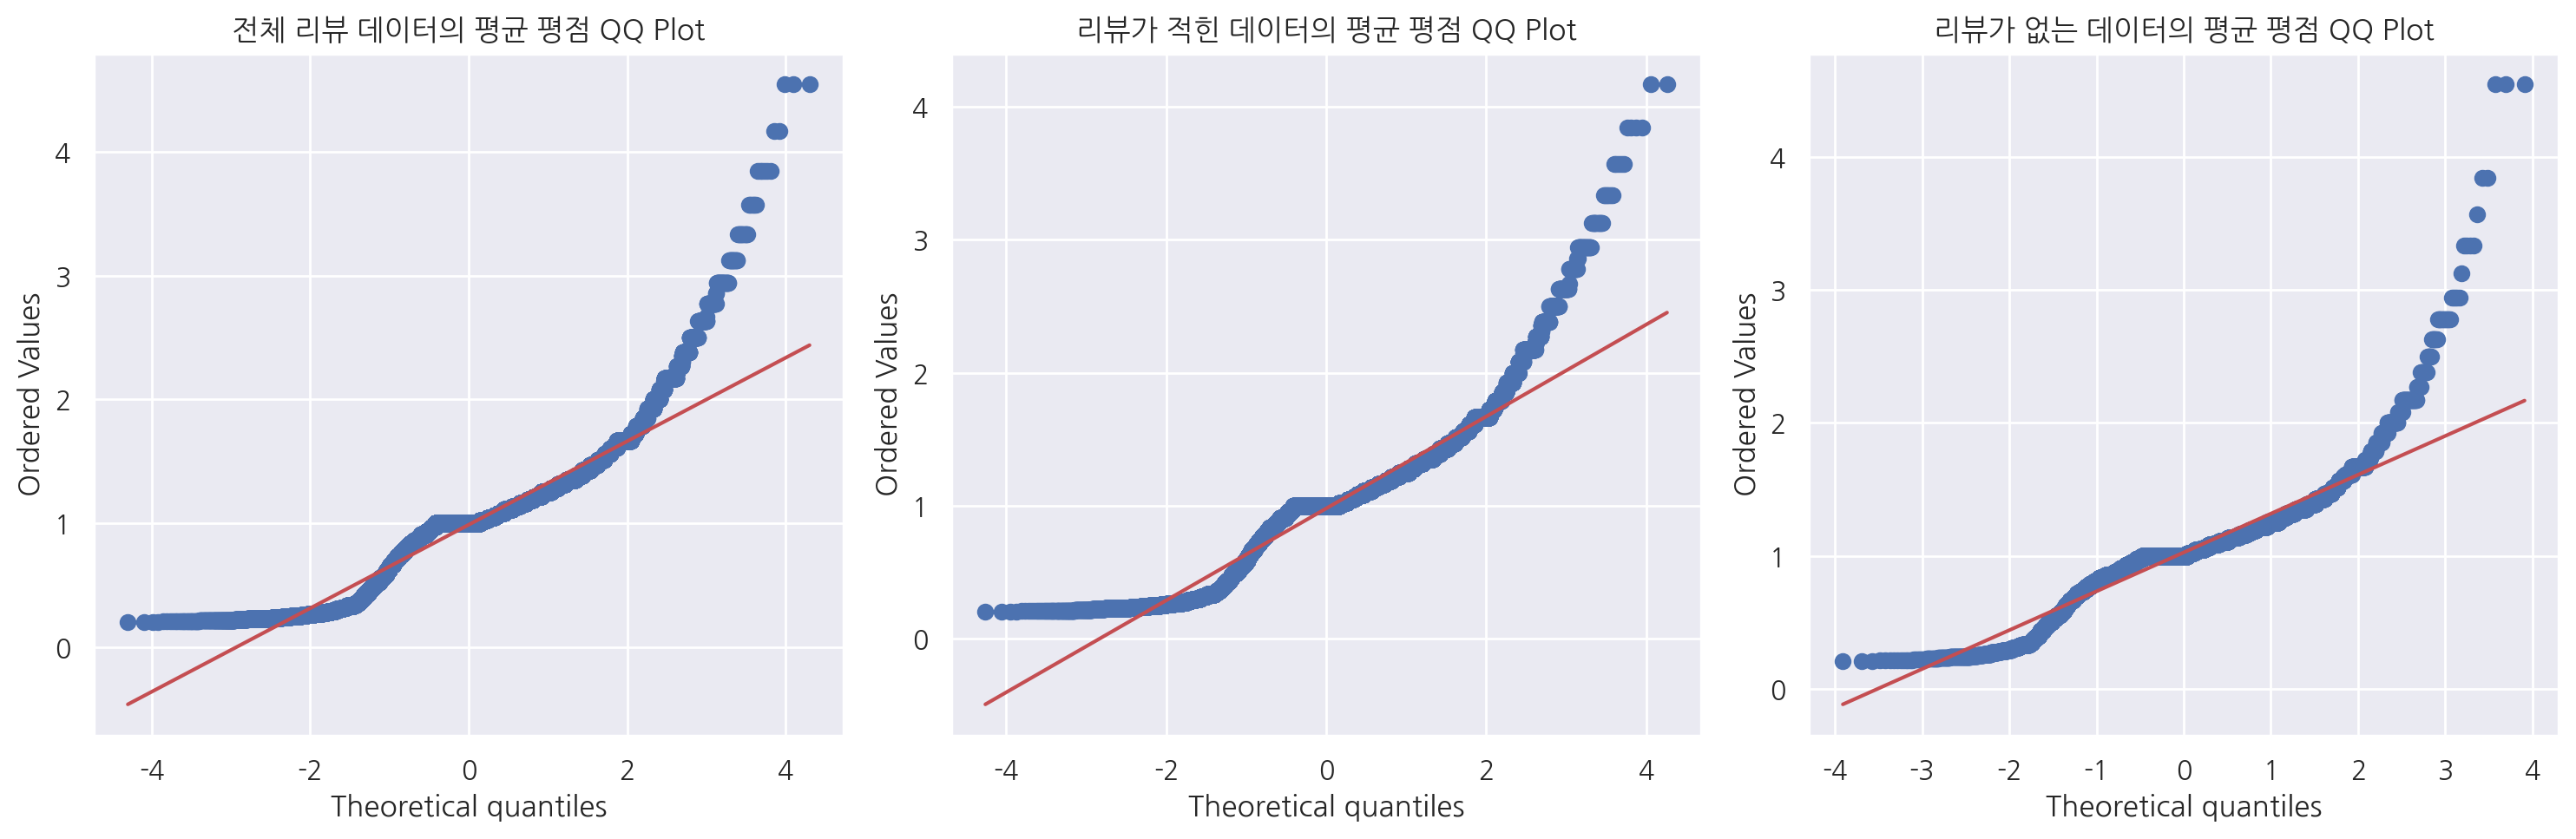

In [176]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ (not grouped) QQ Plot
# Ï†ïÍ∑úÏÑ±ÏùÑ ÎùÑÏßÄ ÏïäÎäîÎã§
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

stats.probplot(reviews["adjusted_rate"], dist=stats.norm, plot=ax1)
stats.probplot(reviews[reviews.is_review==1]["adjusted_rate"], dist=stats.norm, plot=ax2)
stats.probplot(reviews[reviews.is_review==0]["adjusted_rate"], dist=stats.norm, plot=ax3)

# ax1.set_title("QQ Plot for Total Reviews")
# ax2.set_title("QQ Plot for Written Reviews")
# ax3.set_title("QQ Plot for Blank Reviews")

ax1.set_title("Ï†ÑÏ≤¥ Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† ÌèâÏ†ê QQ Plot")
ax2.set_title("Î¶¨Î∑∞Í∞Ä Ï†ÅÌûå Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† ÌèâÏ†ê QQ Plot")
ax3.set_title("Î¶¨Î∑∞Í∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† ÌèâÏ†ê QQ Plot")

plt.tight_layout()
plt.show()

#### ÎπÑÎ™®ÏàòÏ†Å Í≤ÄÏ†ï

- Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•¥ÏßÄ ÏïäÎäî Í≤É ÌôïÏù∏

- Îî∞ÎùºÏÑú, ÎπÑÎ™®ÏàòÏ†Å Í≤ÄÏ†ï ÏãúÌñâ

In [143]:
non_parametic_check(reviews_group_model, reviews_group_no_model, "rate_gmean")

Mann-Whitney U test ÌÜµÍ≥ÑÎüâ: 156138.0
p-value: 0.08542415983080766
Í≤ÄÏ†ïÍ≤∞Í≥º : 5% Ïú†ÏùòÏàòÏ§ÄÏóêÏÑú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌïúÎã§


In [144]:
# Î¶¨Î∑∞Î•º Ïì¥ ÏßëÎã®Í≥º Ïì∞ÏßÄ ÏïäÏùÄ ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†ê Î∂ÑÌè¨ ÎπÑÍµê

palette = ['tab:grey', 'tab:red']

plt.figure(figsize=(15, 8))
sns.histplot(data=reviews_group, x="rate_gmean", hue="is_model_b", kde=True, palette=palette)

plt.axvline(np.mean(reviews_group_model["rate_gmean"]), color="r", linestyle="--")
plt.axvline(np.mean(reviews_group_no_model["rate_gmean"]), color="black", linestyle="--")

plt.text(0.65, 176, "Î™®Î≤îÏùåÏãùÏ†ê ÌèâÍ∑† ÌèâÏ†ê :"+str(round(np.mean(less_median["adjusted_rate"]),2)), 
         color="r", size=15, 
        #  weight="bold"
        )

plt.text(0.95, 176, "ÏùºÎ∞òÏùåÏãùÏ†ê ÌèâÍ∑† ÌèâÏ†ê :"+str(round(np.mean(more_median["adjusted_rate"]),2)), 
         size=15, 
        #  weight="bold"
        )


plt.legend(("Î™®Î≤îÏùåÏãùÏ†ê", "ÏùºÎ∞òÏùåÏãùÏ†ê"), 
        #    prop={'weight':'bold'}
           )
plt.rc("legend", fontsize=15)


plt.xlabel("Ìé∏Ìñ•ÏùÑ Ï†úÍ±∞Ìïú ÌèâÍ∑† ÌèâÏ†ê", size=15)
plt.ylabel("ÌèâÍ∑† ÌèâÏ†ê Í∞úÏàò", size=15)

plt.title("Î™®Î≤îÏùåÏãùÏ†êÍ≥º ÏùºÎ∞òÏùåÏãùÏ†êÏùò ÌèâÍ∑† ÌèâÏ†ê (Ìé∏Ìñ• Ï†úÍ±∞) Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®", size=20)

plt.tight_layout()
plt.show()


##### Í≤∞Î°†
- p-value > 0.05 : Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù

    - Î™®Î≤îÏùåÏãùÏ†ê ÏßÄÏ†ï Ïó¨Î∂ÄÎäî ÏùåÏãùÏ†êÏùò ÌèâÍ∑† ÌèâÏ†êÍ≥º Ïó∞Í¥ÄÏù¥ ÏóÜÎã§

## EDA

In [174]:
# subplot ÏÉùÏÑ±
nrows, ncols = 2, 1
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 8))

# flatten()ÏùÑ ÌÜµÌï¥axesÎ•º 1Ï∞®Ïõê arrayÎ°ú Ìé¥Ï§òÏïº ÌïúÎã§
# axes = axes.T.flatten()

cols = ["review_cnt", "rate_gmean"]


g1 = sns.boxplot(data=reviews_group, x="review_cnt", hue="is_model_b", ax=axes[0])
g2 = sns.boxplot(data=reviews_group, x="rate_gmean", hue="is_model_b", ax=axes[1])


g1.set_title("ÏùåÏãùÏ†êÎ≥Ñ Î¶¨Î∑∞ Í∞úÏàò")
g2.set_title("ÏùåÏãùÏ†êÎ≥Ñ ÌèâÍ∑† ÌèâÏ†ê (Ìé∏Ìñ• Ï†úÍ±∞)")

g1.set_xlabel("Î¶¨Î∑∞ Í∞úÏàò")
g2.set_xlabel("Ìé∏Ìñ•ÏùÑ Ï†úÍ±∞Ìïú ÌèâÍ∑† ÌèâÏ†ê")

plt.tight_layout()
plt.show()


### Í∞ïÎÇ®Íµ¨ Î™®Î≤î ÏùåÏãùÏ†ê VS ÏùºÎ∞ò ÏùåÏãùÏ†ê Î¶¨Î∑∞ Í∞úÏàò ÎπÑÍµê

In [145]:
reviews_group.head(3)

name  is_model_b  review_cnt  rate_gmean
0        Î≥¥ÏΩîÏÑúÏö∏Í∞ïÎÇ®           0          18    0.999651
1          ÌÉÄÏõåÍ∑∏Ïïà           0          20    0.770020
2  (Ï£º)Í∞êÏÑ±ÌÉÄÏΩî Í∞ïÎÇ®Ïó≠Ï†ê           0         142    0.800114

<Axes: xlabel='review_cnt', ylabel='Count'>

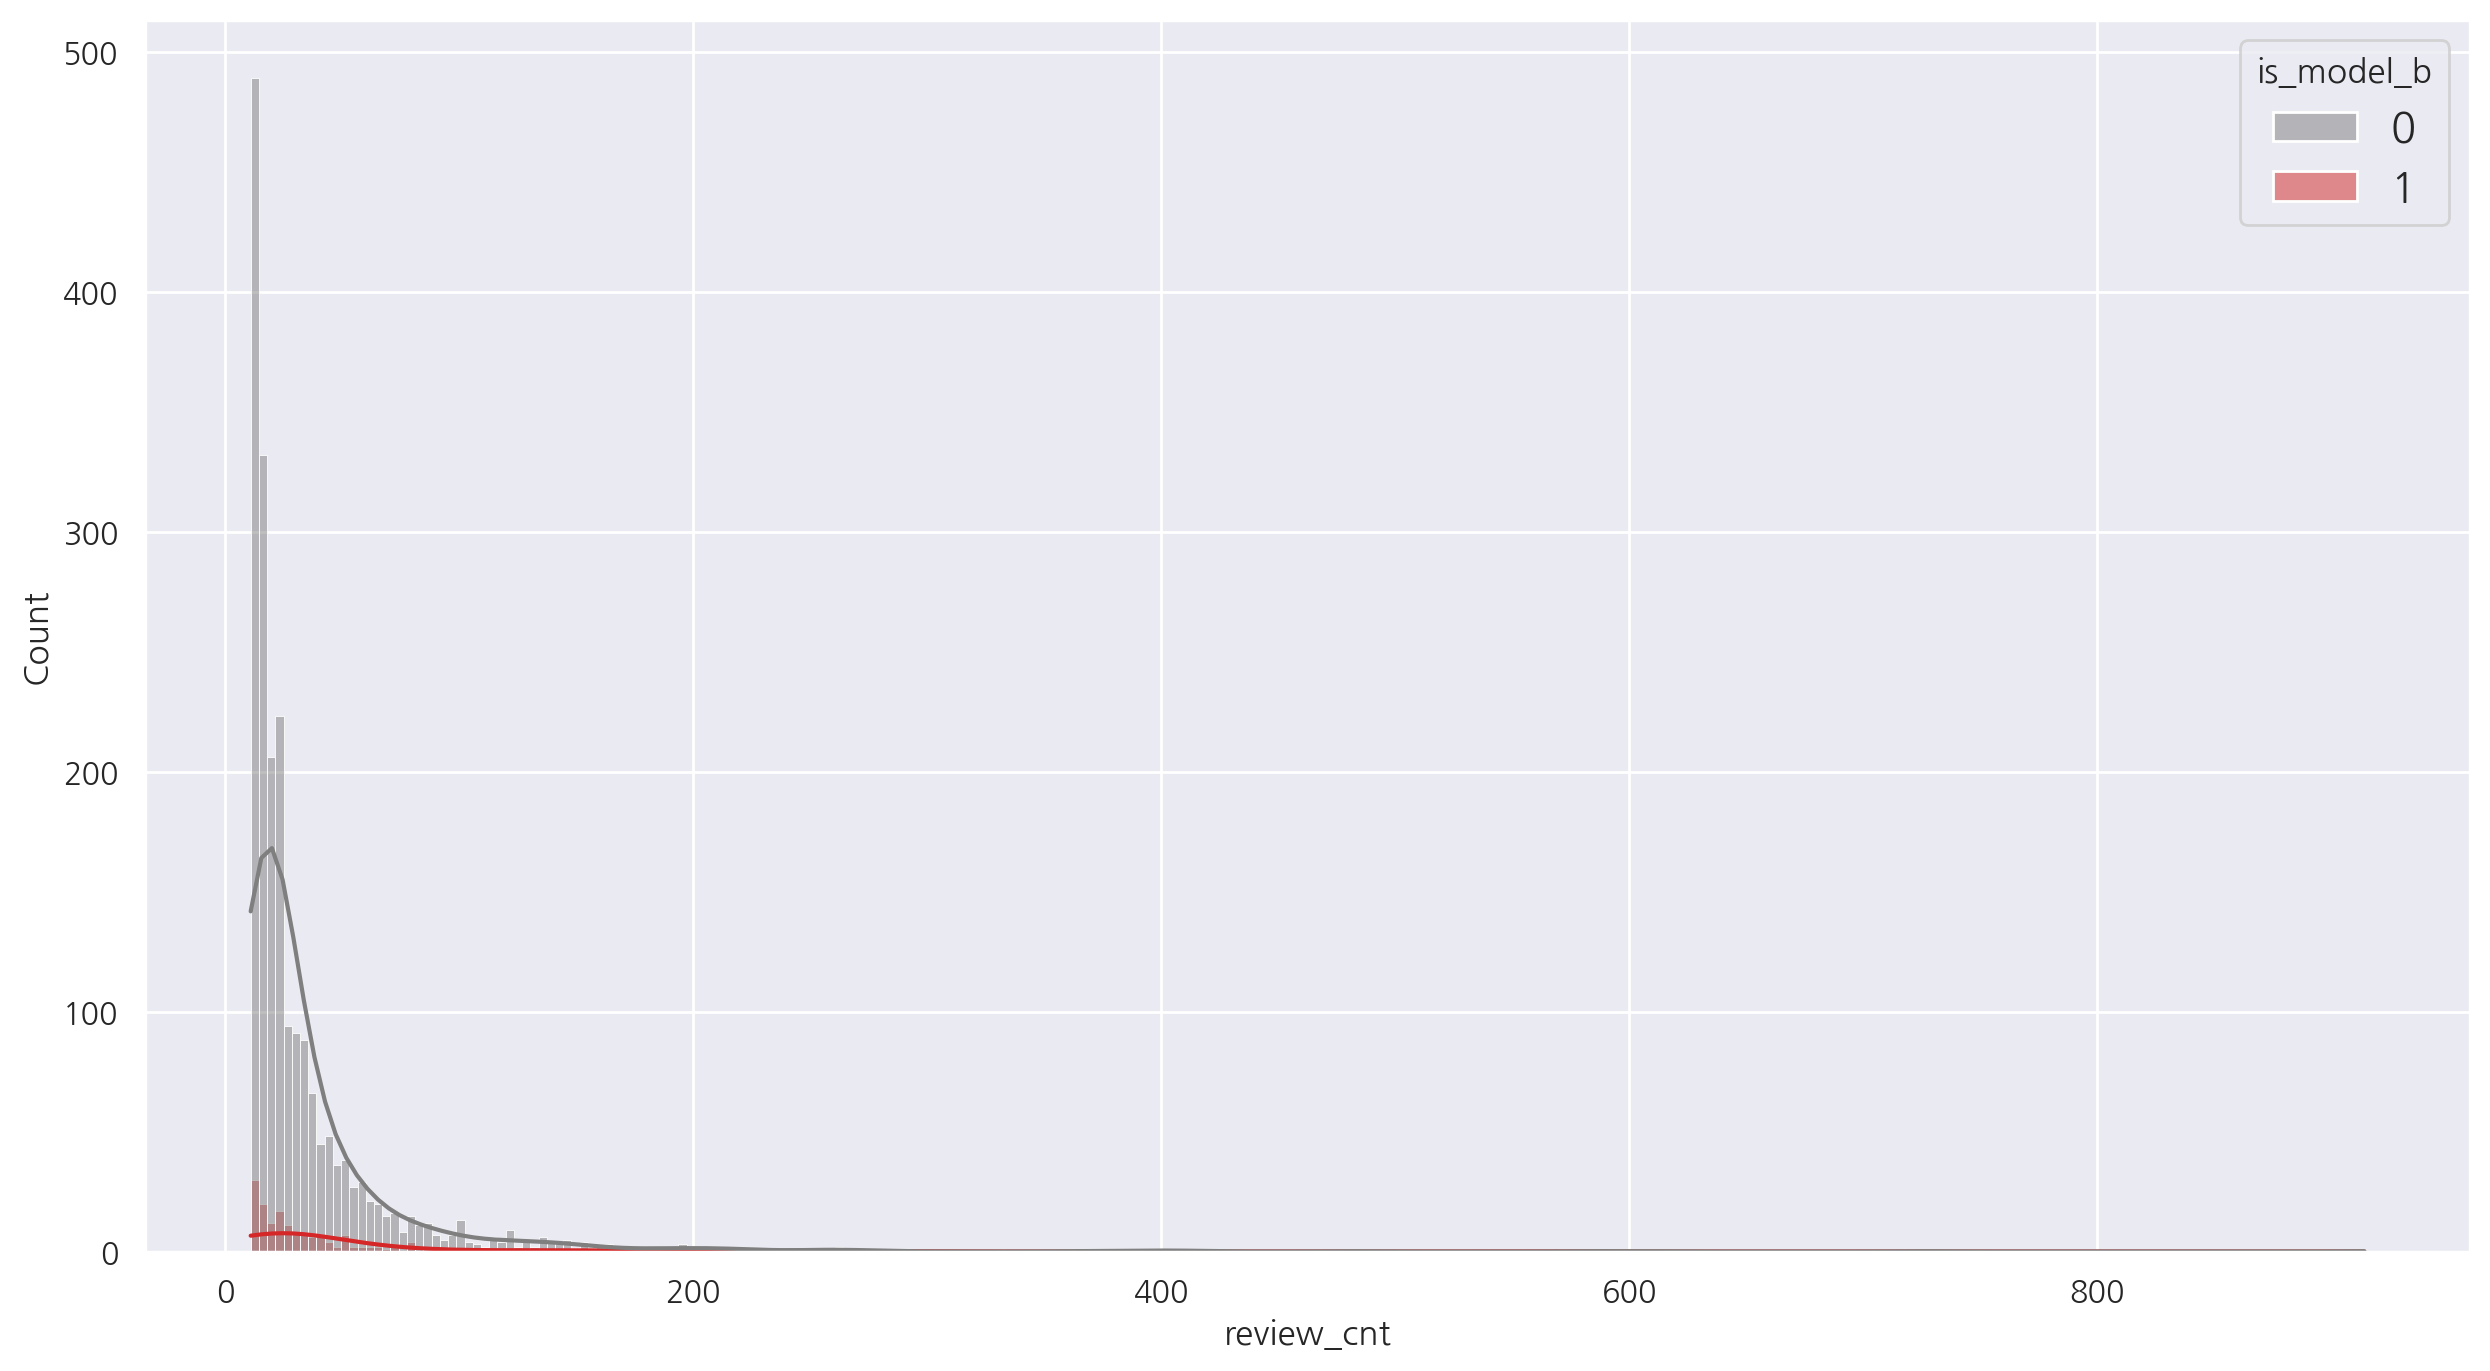

In [146]:
palette = ['tab:grey', 'tab:red']

plt.figure(figsize=(15, 8))
sns.histplot(data=reviews_group, x="review_cnt", hue="is_model_b", kde=True, palette=palette)

In [22]:
# ÏùåÏãùÏ†êÏúºÎ°ú groupbyÌïú Í≤ÉÎì§ Ï§ë Î™®Î≤î ÏùåÏãùÏ†êÏù¥ ÏïÑÎãå Í≤É
normal_check(reviews_group_no_model)

Anderson-Darling Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ: 5.55052145678701
Anderson-Darling Í≤ÄÏ†ïÍ≤∞Í≥º : Ïú†ÏùòÏàòÏ§Ä 5.0ÏóêÏÑú Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ 5.55052145678701Ïù¥ Í∏∞Í∞ÅÏó≠ 0.785 Î≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäîÎã§


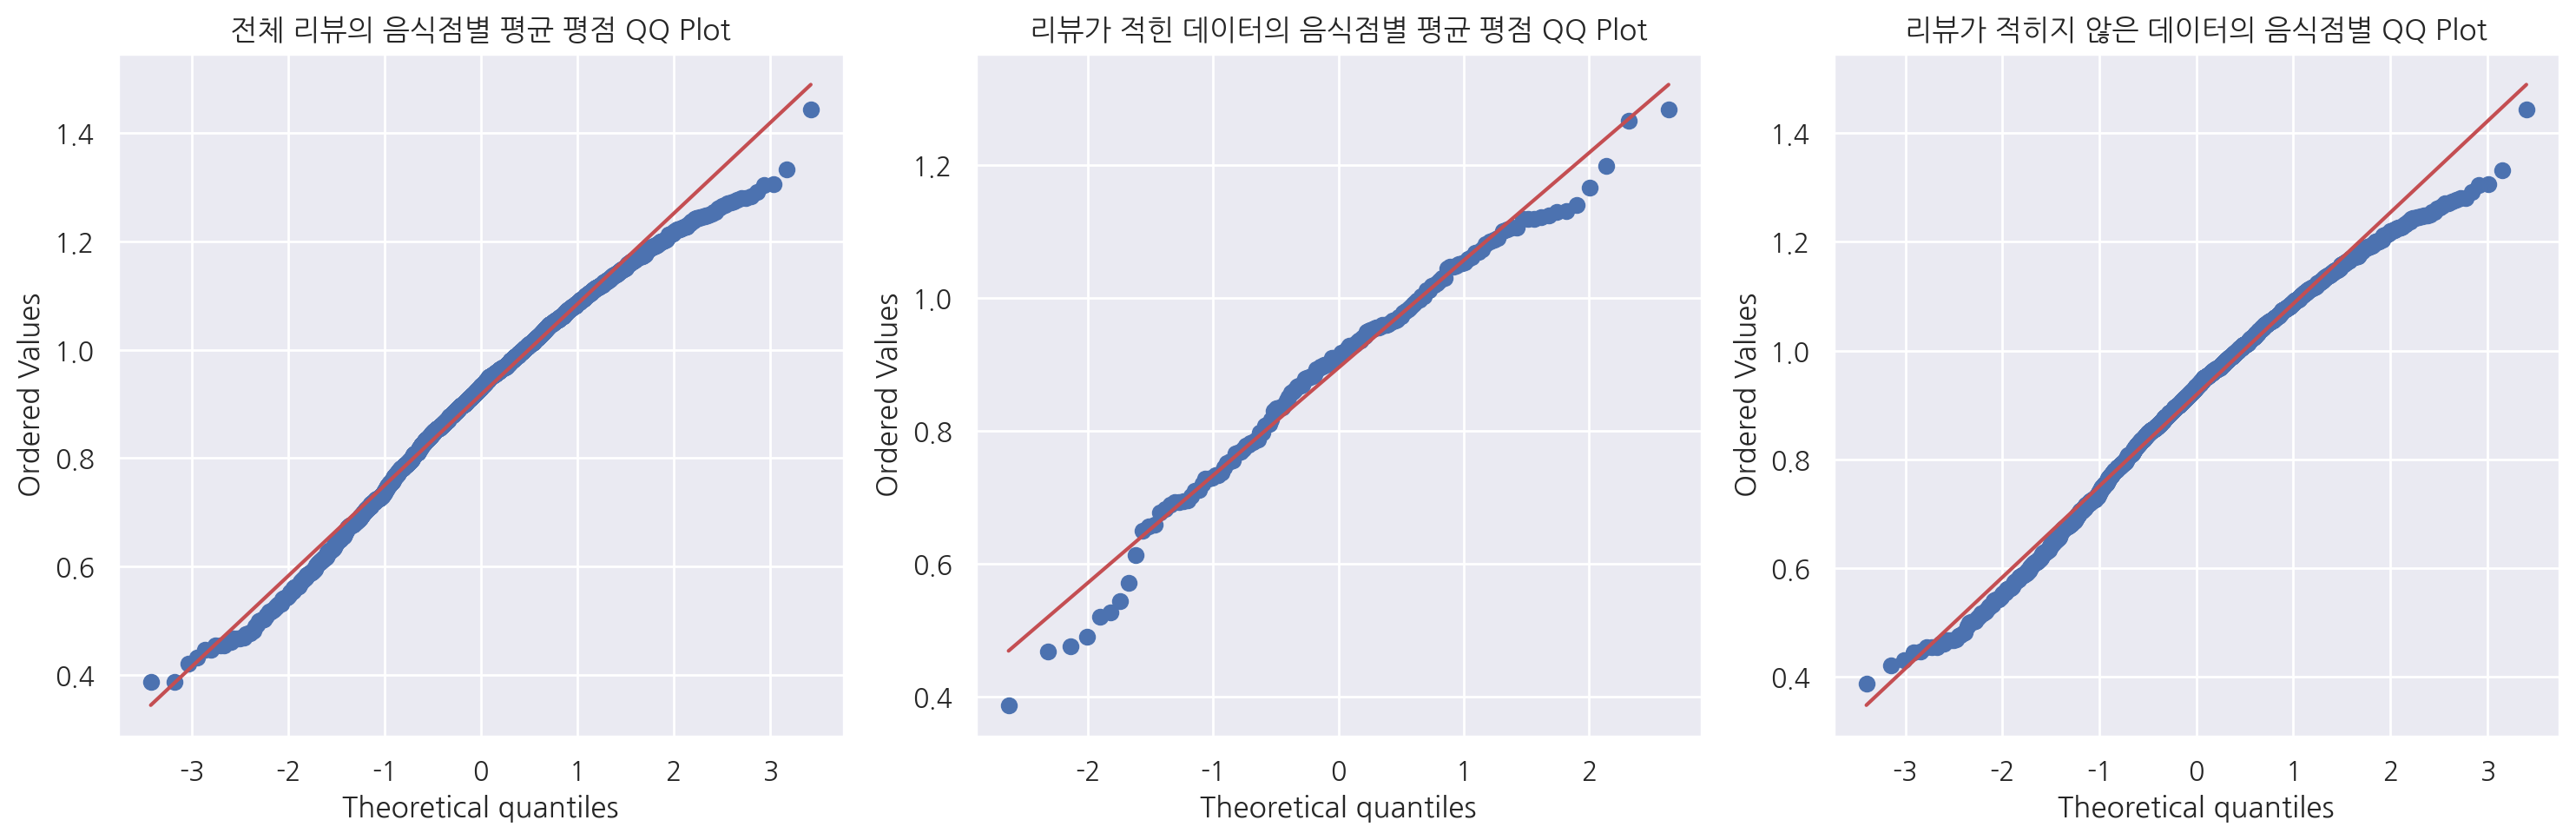

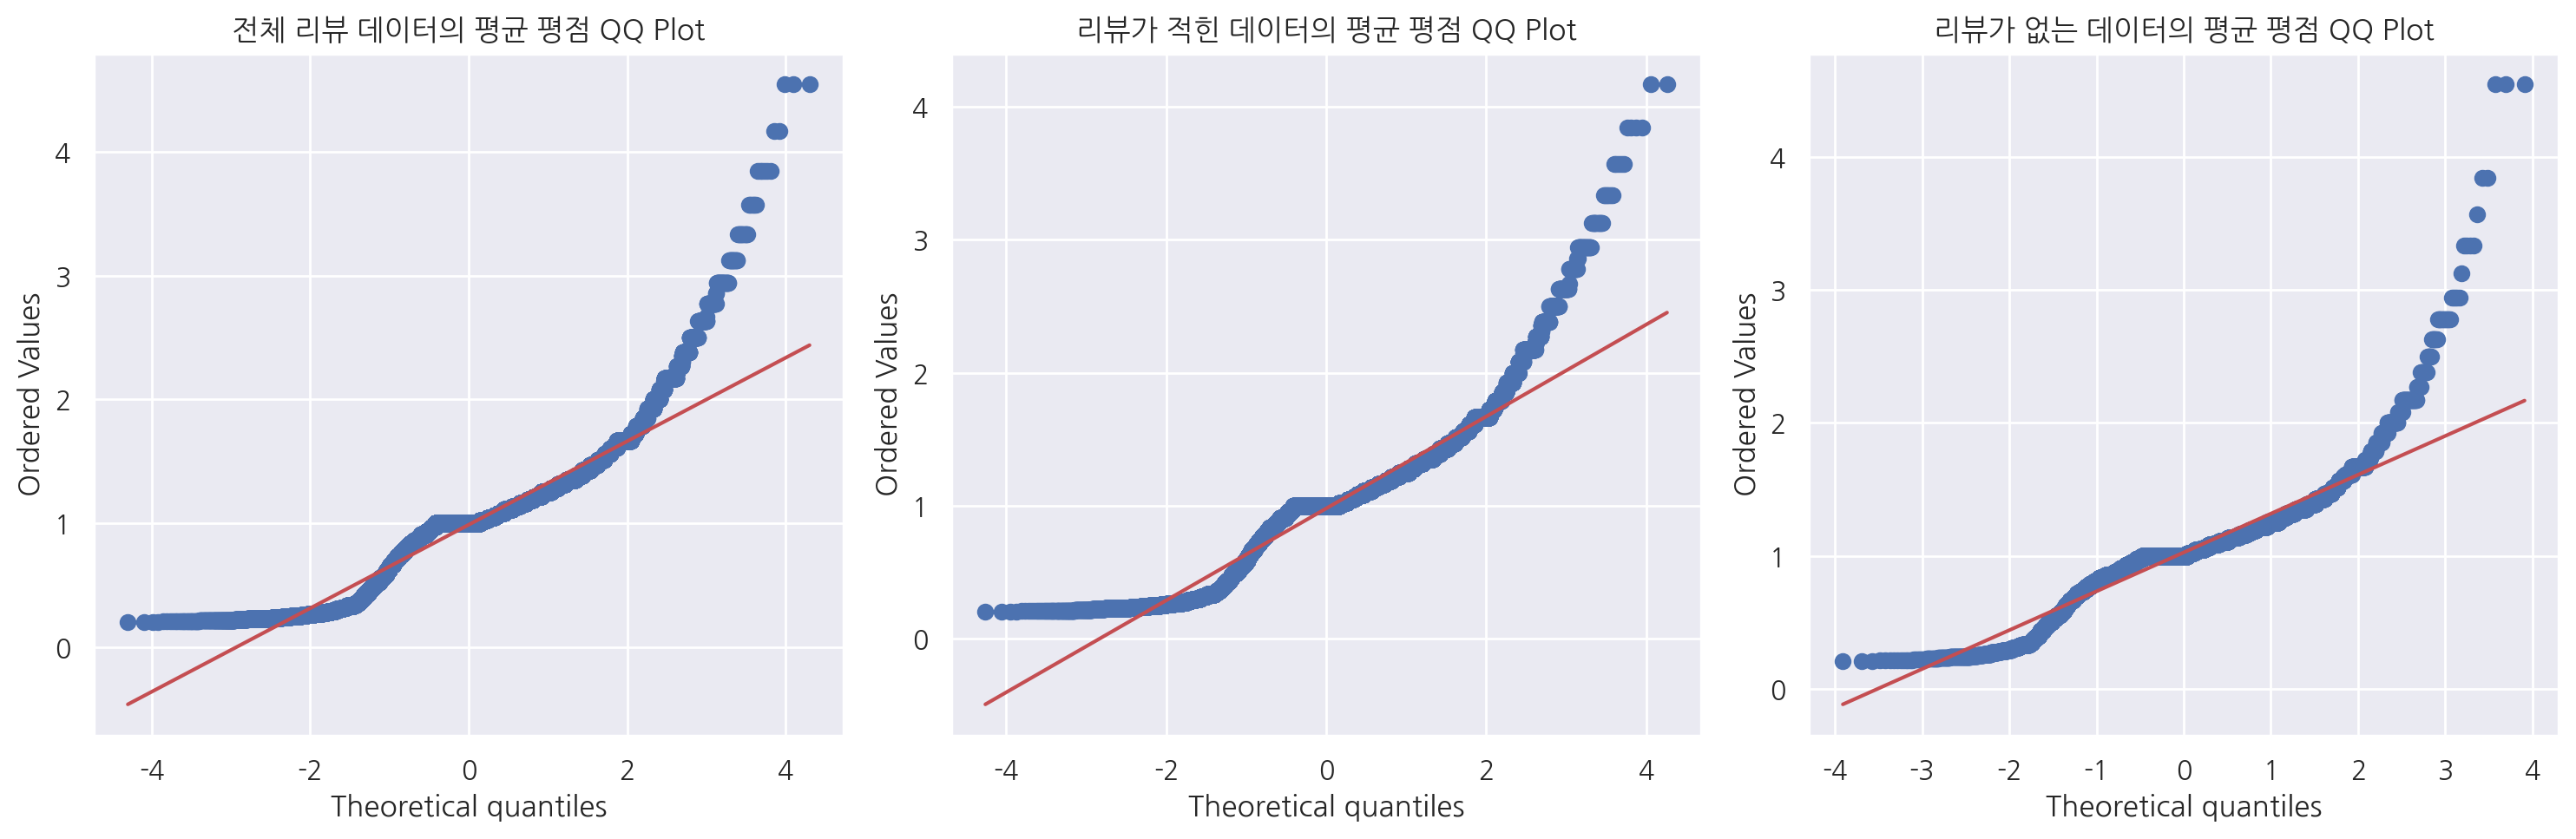

In [29]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ (not grouped) QQ Plot
# Ï†ïÍ∑úÏÑ±ÏùÑ ÎùÑÏßÄ ÏïäÎäîÎã§
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

stats.probplot(reviews["adjusted_rate"], dist=stats.norm, plot=ax1)
stats.probplot(reviews[reviews.is_review==1]["adjusted_rate"], dist=stats.norm, plot=ax2)
stats.probplot(reviews[reviews.is_review==0]["adjusted_rate"], dist=stats.norm, plot=ax3)

# ax1.set_title("QQ Plot for Total Reviews")
# ax2.set_title("QQ Plot for Written Reviews")
# ax3.set_title("QQ Plot for Blank Reviews")

ax1.set_title("Ï†ÑÏ≤¥ Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† ÌèâÏ†ê QQ Plot")
ax2.set_title("Î¶¨Î∑∞Í∞Ä Ï†ÅÌûå Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† ÌèâÏ†ê QQ Plot")
ax3.set_title("Î¶¨Î∑∞Í∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† ÌèâÏ†ê QQ Plot")

plt.tight_layout()
plt.show()

#


### ÎπÑÎ™®ÏàòÏ†Å Î∞©Î≤ï ÏÇ¨Ïö©
- Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã Î∞è Î™®Î≤î ÏùåÏãùÏ†ê Ï†úÏô∏ ÏùåÏãùÏ†ê Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ Î™ªÌï® (Î™®Î≤î ÏùåÏãùÏ†ê Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Ï†ïÍ∑úÏÑ± ÎßåÏ°±)

- Îî∞ÎùºÏÑú, ÎπÑÎ™®ÏàòÏ†Å Î∞©Î≤ï ÏÇ¨Ïö©

### Í∞ÄÏÑ§ Í≤ÄÏ†ï

#### 1. Î¶¨Î∑∞ ÏóÜÏù¥ Î≥ÑÏ†êÎßå Îß§Í∏¥ ÏÇ¨ÎûåÍ≥º Î¶¨Î∑∞Î•º Ï†ÅÏùÄ ÏÇ¨ÎûåÏùò ÌèâÍ∑† ÌèâÏ†êÏù¥ Ï∞®Ïù¥Í∞Ä ÏûàÏùÑÍπå?
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Î¶¨Î∑∞ ÏóÜÏù¥ Î≥ÑÏ†êÎßå Îß§Í∏¥ ÏÇ¨ÎûåÍ≥º Î¶¨Î∑∞Î•º Ï†ÅÏùÄ ÏÇ¨ÎûåÏùò ÌèâÍ∑† ÌèâÏ†êÏù¥ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§

- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Î¶¨Î∑∞ ÏóÜÏù¥ Î≥ÑÏ†êÎßå Îß§Í∏¥ ÏÇ¨ÎûåÍ≥º Î¶¨Î∑∞Î•º Ï†ÅÏùÄ ÏÇ¨ÎûåÏùò ÌèâÍ∑† ÌèâÏ†êÏù¥ Ï∞®Ïù¥Í∞Ä ÏûàÎã§

In [30]:
def non_parametic_check(df1, df2, column):
    
    # Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(df1[column], df2[column])

    print("Mann-Whitney U test ÌÜµÍ≥ÑÎüâ:", statistic)
    print("p-value:", p_value)
    if p_value < 0.05:
        print("Í≤ÄÏ†ïÍ≤∞Í≥º : Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïúÎã§")
    else:
        print("Í≤ÄÏ†ïÍ≤∞Í≥º : 5% Ïú†ÏùòÏàòÏ§ÄÏóêÏÑú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌïúÎã§")

In [31]:
# Î¶¨Î∑∞ ÎÇ¥Ïö©Ïù¥ ÌïÑÏöîÌïòÍ∏∞ ÎïåÎ¨∏Ïóê review Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
# Î¶¨Î∑∞Í∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ÏôÄ Î¶¨Î∑∞Í∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞Î°ú ÎÇòÎààÎã§
no_review = reviews[reviews.is_review == 0]
yes_review = reviews[reviews.is_review == 1]

# Mann-Whitney ÌÖåÏä§Ìä∏ Ï†ÅÏö©
non_parametic_check(no_review, yes_review, "adjusted_rate")

Mann-Whitney U test ÌÜµÍ≥ÑÎüâ: 535078892.0
p-value: 7.225414966041926e-32
Í≤ÄÏ†ïÍ≤∞Í≥º : Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïúÎã§


In [32]:
sns.histplot(data=reviews, x="adjusted_rate", hue="is_review", kde=True)
plt.tight_layout()
plt.show()

##### Í∞ÄÏÑ§ Í≤ÄÏ†ï Í≤∞Î°†
- p-value < 0.05 : Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å

    - Î¶¨Î∑∞Î•º Ïì¥ ÏßëÎã®Í≥º Ïì∞ÏßÄ ÏïäÏùÄ ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†êÏóêÎäî Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï† Ïàò ÏûàÎã§
    
    - Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÎã§

#### 2. Î¶¨Î∑∞ Í∞úÏàòÎäî ÌèâÍ∑† ÌèâÏ†êÍ≥º Ïó∞Í¥ÄÏù¥ ÏûàÏùÑÍπå?
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Ï§ëÏúÑÍ∞íÎ≥¥Îã§ Î¶¨Î∑∞ Í∞úÏàòÎ•º Ï†ÅÍ≤å Ïì∞Îäî ÏßëÎã®Í≥º ÎßéÏù¥ Ïì∞Îäî ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥Í∞Ä ÏóÜÎã§

- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Ï§ëÏúÑÍ∞íÎ≥¥Îã§ Î¶¨Î∑∞ Í∞úÏàòÎ•º Ï†ÅÍ≤å Ïì∞Îäî ÏßëÎã®Í≥º ÎßéÏù¥ Ïì∞Îäî ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥Í∞Ä ÏûàÎã§

In [93]:
reviews

name   user                                             review  \
0        Î∏åÎûòÏÑúÎ¶¨  Navio  Í∞ïÎÇ®Ïóê ÏûàÎäî ÎπÑÏã∏Í≥† Ï¢ãÎã§Îäî Ìò∏ÌÖî Î∑îÌéòÎì§ Í∞ÄÎ¥§ÎäîÎç∞ Ïó¨Í∏∞Í∞Ä Ï†úÏùº Í¥úÏ∞ÆÎÑ§Ïöî. Ï¢ÖÎ•òÎèÑ ÎßéÍ≥†...   
1        Î∏åÎûòÏÑúÎ¶¨  Chris  ÎßõÏûàÎäî Ï†ÄÎÖÅ Î®πÏóàÏñ¥Ïöî. Í∞ÄÏùÑÎ∂ÄÌÑ∞ 1ÎÖÑÍ∞Ñ Î¶¨Î™®Îç∏ÎßÅ Îì§Ïñ¥Í∞ÄÎãà, Í∑∏ Ï†ÑÏóê Ìïú Î≤à Îçî Í∞ÄÏïº...   
2        Î∏åÎûòÏÑúÎ¶¨  Íµ¨Î¶¨Î¶¨Î¶¨Î¶¨  ÏÇºÏÑ±Ïó≠ Ìò∏ÌÖî Î∑îÌéòÏ§ë Ïó¨Í∏∞Í∞Ä Ï†úÏùº ÎßåÏ°±! Ï†êÏã¨ Ï†ÄÎÖÅ ÎëòÎã§ Î®πÏñ¥Î¥§ÎäîÎç∞ Î©îÎâ¥Í∞Ä ÏïÑÏâΩÏßÄÎèÑ ...   
3        Î∏åÎûòÏÑúÎ¶¨     ÌÉúÏú§       Ï£ºÎßê Í∞ÄÏ°±Í≥º Í∞îÎã§ÏôîÎäîÎç∞ ÎßõÏûàÏäµÎãàÎã§~ ÌöåÏõê Í∞ÄÏûÖÍπåÏßÄ ÌïòÍ≥† ÏôîÎÑ§Ïöî Îã§ÏùåÏóê Îòê Í∞ëÎãàÎã§   
4        Î∏åÎûòÏÑúÎ¶¨   jeey  Í∞ÅÏ¢Ö Í≥†Í∏∞Î•ò, ÎûçÏä§ÌÉÄ ÎåÄÍ≤å, Îã§Ï†ÄÌä∏\nÍ∞ÄÎÅî Ï†ïÏ§Ñ ÎÇ¥Î†§ÎÜìÍ≥† Î®πÍ∏∞ Ï¢ãÏïÑÏöî:)\nÏúÑÏ≤≠ÏàòÎäî...   
...       ...    ...                                                ...   
22643  ÏßïÍ∏∞Ïä§Ïπ∏ Ïäå      s  Í∞úÏù∏ ÌîÑÎùºÏù¥ÎπóÎ£∏ÎèÑ ÏûàÍ≥† Ïπ¥Ïö¥ÌÑ∞ÌòïÏúºÎ°ú ÏßÅÏõêÎ∂ÑÎì§Ïù¥ Îã§ Íµ¨ÏõåÏ£ºÏÖîÏÑú Í±∞ÎûòÏ≤ò ÏãùÏÇ¨ ÎåÄÏ†ëÌï†ÎïåÎÇò...   
22644     ÏõîÏ∂úÏÇ∞    ÎåÄÎ∞©Ïñ¥                                                NaN   
22645     ÏõîÏ∂úÏÇ∞    ÍπÄÏßÄÏÑ±  mild seaweed soup, a bit hard and cold rice, o...   
22646     ÏõîÏ∂úÏÇ∞     ÏÑúÍ∏∞  ÏÇ¨Ïû•Îãò! ÏßÅÏõêÍµêÏú°Ï¢ÄÏãúÌÇ§ÏÑ∏Ïöî Ï†úÎ∞ú Î∞•Î®πÏúºÎü¨Í∞àÎïåÎßàÎã§ ÎààÏπòÎ≥¥Ïù¥Í≥† Ï≤¥Ìï†Í±∞Í∞ôÏïÑÏöî ÎÑàÎ¨¥ Î∂àÏπúÏ†à...   
22647     ÏõîÏ∂úÏÇ∞      „ÖÇ  ÏòÜÏßëÏóêÏûàÎäî Í∞ïÎÇ®ÍøÄÎèºÏßÄÍ∞Ä ÎßùÌïòÏó¨ Îì§Ïñ¥Í∞ÄÍ≤å ÎêêÎäîÎç∞ ÏòÅ Î≥ÑÎ£®ÏòÄÎã§. Ïñ¥Î•¥Ïã†Îì§ ÎãπÍ≥® ÏúÑÏ£ºÎ°ú ...   

              date  rate  avg_rate  review_cnt is_model  is_model_b  \
0      2024.04.15.     4       2.5           2   Î™®Î≤îÏãùÎãπÏßÄÏ†ï           1   
1      2024.03.01.     4       2.3          22   Î™®Î≤îÏãùÎãπÏßÄÏ†ï           1   
2      2023.12.20.     5       4.1          35   Î™®Î≤îÏãùÎãπÏßÄÏ†ï           1   
3      2023.12.11.     5       5.0           1   Î™®Î≤îÏãùÎãπÏßÄÏ†ï           1   
4      2023.11.29.     4       4.4          82   Î™®Î≤îÏãùÎãπÏßÄÏ†ï           1   
...            ...   ...       ...         ...      ...         ...   
22643  2024.03.29.     5       5.0           1      NaN           0   
22644  2024.04.23.     1       3.5         489      NaN           0   
22645  2024.04.11.     4       4.3           7      NaN           0   
22646  2023.07.25.     1       1.7          11      NaN           0   
22647  2022.02.03.     1       1.0           4      NaN           0   

       Unnamed: 0 new_name  adjusted_rate  is_review  
0             NaN      NaN       1.600000          1  
1             NaN      NaN       1.739130          1  
2             NaN      NaN       1.219512          1  
3             NaN      NaN       1.000000          1  
4             NaN      NaN       0.909091          1  
...           ...      ...            ...        ...  
22643         NaN      NaN       1.000000          1  
22644         NaN      NaN       0.285714          0  
22645         NaN      NaN       0.930233          1  
22646         NaN      NaN       0.588235          1  
22647         NaN      NaN       1.000000          1  

[97992 rows x 13 columns]

In [91]:
# describe ÌôïÏù∏
df.describe()

is_model_b   review_cnt   rate_gmean
count  5850.000000  5850.000000  5850.000000
mean      0.043419    16.750769     0.950780
std       0.203815    35.682776     0.230190
min       0.000000     1.000000     0.250000
25%       0.000000     3.000000     0.810261
50%       0.000000     7.000000     0.971598
75%       0.000000    17.000000     1.092587
max       1.000000   914.000000     3.125000

In [20]:
reviews.groupby(["name", "is_model_b"]).count()

user  review  date  rate  avg_rate  review_cnt  \
name         is_model_b                                                   
 Î≥¥ÏΩîÏÑúÏö∏Í∞ïÎÇ®      0             18      12    18    18        18          18   
 ÏãúÎåÄÏù∏Ïû¨3Í¥Ä      0              1       1     1     1         1           1   
 Ïπ¥Ìéò ÎπÑÌà¨ÎπÑÏî®     0              3       2     3     3         3           3   
 ÌÉÄÏõåÍ∑∏Ïïà        0             20      14    20    20        20          20   
(Ï£º)Í∞êÏÑ±ÌÉÄÏΩî Í∞ïÎÇ®Ïó≠Ï†ê 0            142     113   142   142       142         142   
...                       ...     ...   ...   ...       ...         ...   
ÌûàÎØ∏Ï∏†&Î±ÖÍ∞ÄÎìú      0              9       8     9     9         9           9   
ÌûàÏïº Î≠âÌã∞Í∏∞       0              5       4     5     5         5           5   
ÌûàÏπ¥Î¶¨          0             20      18    20    20        20          20   
ÌûàÌä∏Ïª§Ìîº Î°úÏä§ÌÑ∞Ïä§ Ïã†ÏÇ¨ 0              6       5     6     6         6           6   
ÌûêÎßÅÌè¨Ï∞®         0              9       8     9     9         9           9   

                         is_model  Unnamed: 0  new_name  adjusted_rate  
name         is_model_b                                                 
 Î≥¥ÏΩîÏÑúÏö∏Í∞ïÎÇ®      0                  0           0         0             18  
 ÏãúÎåÄÏù∏Ïû¨3Í¥Ä      0                  0           0         0              1  
 Ïπ¥Ìéò ÎπÑÌà¨ÎπÑÏî®     0                  0           3         3              3  
 ÌÉÄÏõåÍ∑∏Ïïà        0                  0           0         0             20  
(Ï£º)Í∞êÏÑ±ÌÉÄÏΩî Í∞ïÎÇ®Ïó≠Ï†ê 0                  0         142       142            142  
...                           ...         ...       ...            ...  
ÌûàÎØ∏Ï∏†&Î±ÖÍ∞ÄÎìú      0                  0           0         0              9  
ÌûàÏïº Î≠âÌã∞Í∏∞       0                  0           0         0              5  
ÌûàÏπ¥Î¶¨          0                  0          20        20             20  
ÌûàÌä∏Ïª§Ìîº Î°úÏä§ÌÑ∞Ïä§ Ïã†ÏÇ¨ 0                  0           0         0              6  
ÌûêÎßÅÌè¨Ï∞®         0                  0           9         9              9  

[5850 rows x 10 columns]

In [6]:
reviews_df = pd.read_csv("data/reviews.csv")
reviews_df = reviews_df.rename(columns={"stoe_name":"store_name"})
reviews_df.head()

store_name    user  rate  avg_rate  \
0       Ïù¥ÎèÑÍ≥∞ÌÉï  ÍµâÏû•Ìï¥ÏóÑÏ≤≠ÎÇò   5.0       3.6   
1       Ïù¥ÎèÑÍ≥∞ÌÉï       Ïªπ   2.0       3.0   
2       Ïù¥ÎèÑÍ≥∞ÌÉï       ü§†   5.0       4.0   
3       Ïù¥ÎèÑÍ≥∞ÌÉï    ÎØ∏Í∞ÅÏÑ∏Ìè¨   5.0       4.0   
4       Ïù¥ÎèÑÍ≥∞ÌÉï       .   5.0       3.7   

                                              review review_count  
0                                                NaN          434  
1  ÎÑàÎ¨¥ ÏßúÏöî. Ï≤òÏùåÏóî Î®πÏùÑÎßåÌñàÎäîÎç∞. Ï†àÎ∞òÏ†ïÎèÑ Î®πÍ≥†ÎÇòÏÑ† ÎÑàÎ¨¥ ÏßúÏÑú ÏßúÏ¶ùÎÇ† Ï†ïÎèÑÏûÑ. Îßõ ...           13  
2  Í≥∞ÌÉï Ï†ïÎßê Îπ®Î¶¨ÎÇòÏòµÎãàÎã§. Ï£ºÎ¨∏ÌïòÍ≥† 5Î∂ÑÎèÑ ÏïàÎêòÏÑú ÏùåÏãù Î∞õÏùÄÍ±∞ Í∞ôÏïÑÏöî. Ï†ïÎßê ÎßõÏûàÍ≥† ...            7  
3  ÏàòÏú°Ïù¥Îûë Í≥∞ÌÉïÎ®πÏóàÏñ¥ÏöîÍ≥∞ÌÉïÏùÄ Ï£ºÎ¨∏ÌïòÏûêÎßàÏûê Îπ®Î¶¨ ÎÇòÏôîÏñ¥ÏöîÍ≥†Í∏∞ÎèÑ ÎßéÏù¥ Îì§Ïñ¥Í∞ÄÏûàÍ≥†Í∞ÑÏù¥ ÎêòÏñ¥...           99  
4  ÏÑ∏Ï¢ÖÎåÄÏôïÏùò Ïù¥Î¶Ñ (Ïù¥ÎèÑ ÊùéË£™)Ïóê Í±∏ÎßûÎäî ÏßÑÌïú ÎßõÏùò Í≥∞ÌÉïÏûÖÎãàÎã§ÎßàÏπ® Ï†úÏòÜÏóê Ïô∏Íµ≠Ïù∏ÎèÑ ÏôÄ...          171

In [17]:
reviews_df.shape

(8873, 6)

In [65]:
reviews_df["reg_rate"] = reviews_df["rate"] / reviews_df["avg_rate"]

In [66]:
reviews_df.groupby(["store_name"])[["review"]].count().sort_values(by="review", ascending=False)[:10]

review
store_name         
(Ï£º)Ï§ëÏïôÌï¥Ïû•         428
Î∞±ÏñµÌïòÎàÑ            245
Ìò∏Î≥¥ÏãùÎãπ            240
Í∞ìÌÖêÏä§ÏãúÍ∞ïÎÇ®Ï†ê         198
ÏµúÍ∞ÄÎÑ§Î≤ÑÏÑØÎß§Ïö¥ÌÉïÏπºÍµ≠Ïàò     182
Ï∑®ÏòÅÎ£®             164
ÌïòÎ£®              146
ÌòÑ Ïö∞Îèô            139
Ïù¥ÎèÑÍ≥∞ÌÉï            127
ÎåÄÍ∞ÄÎ∞©             127

In [67]:
reviews_df[reviews_df["store_name"] == "(Ï£º)Ï§ëÏïôÌï¥Ïû•"]

store_name        user  rate  avg_rate  \
6349    (Ï£º)Ï§ëÏïôÌï¥Ïû•           üí§   4.0       3.0   
6350    (Ï£º)Ï§ëÏïôÌï¥Ïû•         Ïû•Ìò∏Ï≤†   5.0       4.1   
6351    (Ï£º)Ï§ëÏïôÌï¥Ïû•       miyeh   3.0       4.0   
6352    (Ï£º)Ï§ëÏïôÌï¥Ïû•      Î∂àÏπúÏ†àÏã´Ïñ¥Ïöî   5.0       3.2   
6353    (Ï£º)Ï§ëÏïôÌï¥Ïû•         ÍπÄÏπòÌÜµ   5.0       4.2   
...         ...         ...   ...       ...   
6898    (Ï£º)Ï§ëÏïôÌï¥Ïû•         Î•òÍ∑ºÏàò   3.0       2.6   
6899    (Ï£º)Ï§ëÏïôÌï¥Ïû•        ÎßõÌÉêÌóòÍ∞Ä   5.0       3.9   
6900    (Ï£º)Ï§ëÏïôÌï¥Ïû•   ChloepapA   5.0       4.1   
6901    (Ï£º)Ï§ëÏïôÌï¥Ïû•          ÌååÎ£®   5.0       3.1   
6902    (Ï£º)Ï§ëÏïôÌï¥Ïû•  Í≥®Î∞© Î≤†Ïù¥ÏãúÏä§Ìä∏..   5.0       4.7   

                                                 review  review_count  \
6349                                           ÎßõÏûàÏßÄÎßå ÎπÑÏåà‚Ä¶            77   
6350                                      Ïñ∏Ï†úÎÇò Î∞∞Ïã†ÌïòÏßÄ ÏïäÎäî Îßõ            60   
6351            ÎßõÏùÄ ÏûàÏßÄÎßå Ïù¥Ï†ïÎèÑ Í∞ÄÍ≤©ÏùÄ ÎÑàÎ¨¥ Î∞õÏïÑÎ®πÎäîÍ±∞ Í∞ôÏùå.. Ï£ºÏ∞®ÎπÑ ÏßÄÏõêÎèÑ ÏïàÎê®           355   
6352                                              Í∑∏ÎÉ• ÎßõÏßë            21   
6353                                Î≥ÑÏ†ê ÎÜíÏùÄÏù¥Ïú†Îäî Îã§ Ïù¥Ïú†Í∞Ä ÏûàÏäµÎãàÎã§           106   
...                                                 ...           ...   
6898                                             ÏÑ†ÏßÄÌï¥Ïû•Íµ≠.           536   
6899                                                NaN            14   
6900                                                NaN           158   
6901       ÏôÑÏ†Ñ ÍπîÎÅîÌïòÍ≥† ÎßõÏûàÏùå.Í∑∏ÎèôÏïà Î®πÏñ¥Î≥∏ ÏñëÏÑ†ÏßÄ Ìï¥Ïû•Íµ≠ Ï§ë Í±∞Ïùò ÏµúÍ≥†Ïû°ÎÇ¥ÎèÑ ÌïòÎÇò ÏóÜÏùå           611   
6902  Ï¢ãÏùÄ Ïû¨Î£åÎ°ú Ï†ïÎ©¥ÏäπÎ∂ÄÌïúÎã§ÎäîÎäêÎÇå. 8Ï≤úÏõêÏù¥ÎùºÎäî Í∞ÄÍ≤©Ïù¥ ÎÇ©ÎìùÏù¥ Îê† Ï†ïÎèÑÎ°ú ÎÇ¥Ïû•Ïù¥ Îì¨Îøç ...            60   

      reg_rate  
6349  1.333333  
6350  1.219512  
6351  0.750000  
6352  1.562500  
6353  1.190476  
...        ...  
6898  1.153846  
6899  1.282051  
6900  1.219512  
6901  1.612903  
6902  1.063830  

[554 rows x 7 columns]

In [68]:
reviews_df[reviews_df.user.isna()]

store_name user  rate  avg_rate  \
120            Ïù¥ÎèÑÍ≥∞ÌÉï  NaN   3.0       3.0   
433      ÎãàÎΩïÎÇ¥ÎΩï(ÏΩîÏóëÏä§Ï†ê)  NaN   1.0       3.0   
496   Ïò§Î∞úÌÉÑ(Ï£º)Ïò§Î∞úÌÉÑÏóêÌîÑÏóêÏä§  NaN   5.0       3.8   
597            ÏàòÎ¶ºÎ≥µÍµ≠  NaN   3.0       3.7   
690          (Ï£º)Í≥∞Î∞îÏúÑ  NaN   3.0       3.8   
1257             ÏÜ°Ìôî  NaN   4.0       3.5   
1707            Íµ¨Ïù¥Í∞Ä  NaN   5.0       5.0   
1731            Íµ¨Ïù¥Í∞Ä  NaN   4.0       4.0   
1780         ÎßåÎëêÏùò Ï†ÑÏÑ§  NaN   5.0       3.0   
3139        Ïã†ÏùòÏ£ºÏ∞πÏåÄÏàúÎåÄ  NaN   1.0       1.0   
3520           ÏΩîÎÑàÏä§ÌÜ§  NaN   5.0       3.6   
3991           ÌòÑ Ïö∞Îèô  NaN   1.0       1.0   
4502     (Ï£º)ÎèÑÎùºÌõÑÍµ¨ÌòÑÎ≥µÏßë  NaN   4.0       4.0   
4640         Î∞∞Ï†ïÏ≤† Ïñ¥ÎèÑ  NaN   1.0       2.9   
6223            Ï≤≠ÏûêÍ≥®  NaN   5.0       5.0   
7287  (Ï£º)Ïö∞ÎèôÎ™ÖÍ∞ÄÍ∏∞Î¶¨ÏïºÎßàÎ≥∏ÏßÑ  NaN   5.0       2.3   
8334      ÎØ∏ÏÇ¨Î¶¨Î∞ÄÎπõÏ¥àÍ≥ÑÍµ≠Ïàò  NaN   4.0       2.2   

                                                 review  review_count  \
120                                                 NaN             1   
433   Í∞ôÏùÄ ÎãàÎΩïÎÇ¥ÎΩïÏù∏Îç∞ Ïôú Î≥ÑÏ†êÏù¥ ÎÇÆÏùÄÍ±¥Í∞Ä ÏùòÎ¨∏Ïù¥ Îì§ÏóàÎäîÎç∞Î≥ÑÏ†ê ÌïòÎÇò ÏûêÏ≤¥Í∞Ä ÎÑàÎ¨¥ÎÑàÎ¨¥ ÏïÑÍπù...             2   
496                                  Í∞ÄÍ≤©Ïù¥ÏÇ¨ÏïÖÌïòÏßÄÎßå Í∑∏ÏóêÎßõÎäî ÌÄÑÍ≥º Îßõ            44   
597                                                 NaN             3   
690                                                 NaN            44   
1257                                                NaN            42   
1707                                            Ï∞∏ ÎßõÏûàÏóàÏñ¥Ïöî             1   
1731                                                NaN             1   
1780                                                NaN             2   
3139  ÎßõÏùÄÏûàÏßÄÎßå ÏòÅÏóÖÏãúÍ∞Ñ ÏÉÅÏù¥ÌïòÍ≥† Îçî Ïû•ÏÇ¨ÌïòÍ≥†ÏûêÌïòÎäî ÏùòÏßÄÍ∞Ä ÏóÜÏùå Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Î∂àÏπúÏ†àÌï®  Ï£º...             1   
3520                                                NaN            63   
3991  ÏßÑÏßú ÎÑàÎ¨¥ÎÑàÎ¨¥ Î≥ÑÎ°úÏòàÏöî Í∑∏ÎÉ• ÌäπÏÉâÎèÑ ÏóÜÍ≥† ÏßúÍ≥† ÎßõÏóÜÎÑ§Ïöî. Ïò§Ìîà Ìï†Îïå Í∞ÄÏÑú Ïõ®Ïù¥ÌåÖÏùÄ ...             2   
4502                                                NaN             1   
4640                                                NaN            25   
6223                                           ÎßõÏûàÏóàÏäµÎãàÎã§^^             2   
7287                                   Î©¥Ïù¥ ÏßÑÏßú Ï´ÑÍπÉÌïòÍ≥† ÎßõÏûàÏñ¥Ïöî.             3   
8334                    ÎßõÏùÄ ÌèâÎ≤îÌïú Ìé∏Ïù∏Îç∞ ÏßÅÏõêÎ∂ÑÎì§Ïù¥ ÏπúÏ†àÌïòÏÖîÏÑú Í∏∞ÏñµÏóê ÎÇ®ÏïÑÏöî.            25   

      reg_rate  
120   1.000000  
433   0.333333  
496   1.315789  
597   0.810811  
690   0.789474  
1257  1.142857  
1707  1.000000  
1731  1.000000  
1780  1.666667  
3139  1.000000  
3520  1.388889  
3991  1.000000  
4502  1.000000  
4640  0.344828  
6223  1.000000  
7287  2.173913  
8334  1.818182

### Í∞ÄÏÑ§Í≤ÄÏ†ï

#### 1. ÎÇ¥Ïö© ÏóÜÏù¥ Î≥ÑÏ†êÎßå Îß§Í∏¥ ÏÇ¨ÎûåÍ≥º ÎÇ¥Ïö©ÏùÑ Ï†ÅÏùÄ ÏÇ¨ÎûåÏùò ÌèâÍ∑†Ïù¥ Ï∞®Ïù¥Í∞Ä ÏûàÏùÑÍπå?
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : ÎÇ¥Ïö© ÏóÜÏù¥ Î≥ÑÏ†êÎßå Îß§Í∏¥ ÏÇ¨ÎûåÍ≥º ÎÇ¥Ïö©ÏùÑ Ï†ÅÏùÄ ÏÇ¨ÎûåÏùò ÌèâÍ∑†Ïù¥ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : ÎÇ¥Ïö© ÏóÜÏù¥ Î≥ÑÏ†êÎßå Îß§Í∏¥ ÏÇ¨ÎûåÍ≥º ÎÇ¥Ïö©ÏùÑ Ï†ÅÏùÄ ÏÇ¨ÎûåÏùò ÌèâÍ∑†Ïù¥ Ï∞®Ïù¥Í∞Ä ÏûàÎã§

In [69]:
# ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï Î†àÌçºÎü∞Ïä§ 
# https://recipesds.tistory.com/entry/%EC%96%B4%EB%94%94%EC%97%90-%EC%96%B4%EB%96%A4-%EB%AA%A8%EC%88%98-%EA%B2%80%EC%A0%95%EA%B3%BC-%EB%B9%84%EB%AA%A8%EC%88%98-%EA%B2%80%EC%A0%95%EC%9D%84-%EC%93%B8-%EC%88%98-%EC%9E%88%EB%8A%94%EC%A7%80-%EB%8C%80%ED%83%90%ED%97%98-%EA%B7%B8%EB%A6%AC%EA%B3%A0-%ED%8C%8C%EC%9D%B4%EC%8D%AC

In [70]:

np.mean(reviews_df[reviews_df.review.isna()]["rate"])


4.0027352297593

In [71]:
np.mean(reviews_df[reviews_df.review.notnull()]["rate"])


3.672391767210788

In [72]:
from scipy import stats

no_review = reviews_df[reviews_df.review.isna()]["rate"]
yes_review = reviews_df[reviews_df.review.notnull()]["rate"]

stats.mannwhitneyu(no_review, yes_review)

MannwhitneyuResult(statistic=6865741.0, pvalue=3.7630157178579584e-06)

In [73]:
no_review_reg = reviews_df[reviews_df.review.isna()]["reg_rate"]
yes_review_reg = reviews_df[reviews_df.review.notnull()]["reg_rate"]

<Axes: xlabel='reg_rate', ylabel='Count'>

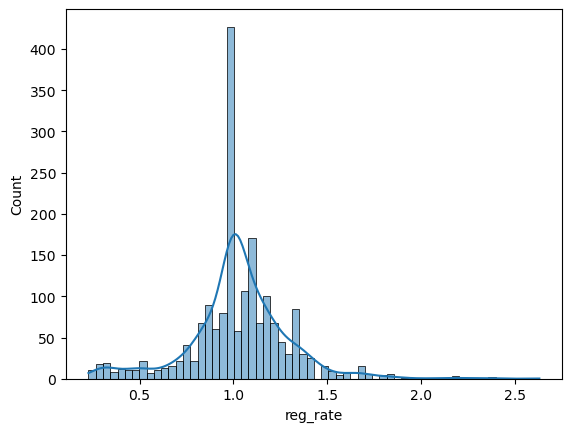

In [77]:
sns.histplot(no_review_reg, kde=True)

In [78]:
sns.histplot(yes_review_reg, kde=True)


<Axes: xlabel='reg_rate', ylabel='Count'>

In [74]:
stats.shapiro(no_review_reg)

ShapiroResult(statistic=0.9353502075457881, pvalue=1.8205085342715463e-27)

In [75]:
stats.shapiro(yes_review_reg)


ShapiroResult(statistic=0.9221222878482117, pvalue=4.128664761159962e-51)

##### Í≤∞Î°†
- p-value < 0.05 : Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å
    - Î¶¨Î∑∞Î•º Ïì¥ ÏßëÎã®Í≥º Ïì∞ÏßÄ ÏïäÏùÄ ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†êÏóêÎäî Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï† Ïàò ÏûàÎã§
    - Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÎã§

#### 2. Î¶¨Î∑∞ Í∞úÏàòÎäî ÌèâÍ∑† ÌèâÏ†êÍ≥º Ïó∞Í¥ÄÏù¥ ÏûàÏùÑÍπå?
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Ï§ëÏúÑÍ∞íÎ≥¥Îã§ Î¶¨Î∑∞ Í∞úÏàòÎ•º Ï†ÅÍ≤å Ïì∞Îäî ÏßëÎã®Í≥º ÎßéÏù¥ Ïì∞Îäî ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥Í∞Ä ÏóÜÎã§
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Ï§ëÏúÑÍ∞íÎ≥¥Îã§ Î¶¨Î∑∞ Í∞úÏàòÎ•º Ï†ÅÍ≤å Ïì∞Îäî ÏßëÎã®Í≥º ÎßéÏù¥ Ïì∞Îäî ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥Í∞Ä ÏûàÎã§

In [32]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8873 entries, 0 to 8872
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_name    8873 non-null   object 
 1   user          8856 non-null   object 
 2   rate          8873 non-null   float64
 3   avg_rate      8873 non-null   float64
 4   review        7045 non-null   object 
 5   review_count  8873 non-null   object 
dtypes: float64(2), object(4)
memory usage: 416.0+ KB


In [42]:
reviews_df["review_count"] = reviews_df["review_count"].str.replace(",","").astype("int")

In [44]:
reviews_df["review_count"] = reviews_df["review_count"].astype("int")

In [45]:
reviews_df.describe()

rate     avg_rate  review_count
count  8873.000000  8873.000000   8873.000000
mean      3.740449     3.793666    167.465232
std       1.465998     0.947893    582.338960
min       1.000000     1.000000      1.000000
25%       3.000000     3.300000      8.000000
50%       4.000000     3.900000     33.000000
75%       5.000000     4.500000    121.000000
max       5.000000     5.000000   8538.000000

In [63]:
less = reviews_df[reviews_df["review_count"] < np.median(reviews_df["review_count"])]["rate"]
more = reviews_df[reviews_df["review_count"] >= np.median(reviews_df["review_count"])]["rate"]

stats.mannwhitneyu(less, more,
                #    alternative="greater"
                   )

MannwhitneyuResult(statistic=10809879.5, pvalue=2.0117173561944988e-17)

##### Í≤∞Î°†
- p-value < 0.05 : Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å
    - Ï§ëÏúÑÍ∞íÎ≥¥Îã§ Î¶¨Î∑∞ Í∞úÏàòÎ•º Ï†ÅÍ≤å Ïì∞Îäî ÏßëÎã®Í≥º ÎßéÏù¥ Ïì∞Îäî ÏßëÎã®Ïùò ÌèâÍ∑† ÌèâÏ†ê Ï∞®Ïù¥Í∞Ä ÏûàÎã§Í≥† Î≥º Ïàò ÏûàÎã§
    - Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÎã§

## EDA

In [79]:
reviews_df.head()

store_name    user  rate  avg_rate  \
0       Ïù¥ÎèÑÍ≥∞ÌÉï  ÍµâÏû•Ìï¥ÏóÑÏ≤≠ÎÇò   5.0       3.6   
1       Ïù¥ÎèÑÍ≥∞ÌÉï       Ïªπ   2.0       3.0   
2       Ïù¥ÎèÑÍ≥∞ÌÉï       ü§†   5.0       4.0   
3       Ïù¥ÎèÑÍ≥∞ÌÉï    ÎØ∏Í∞ÅÏÑ∏Ìè¨   5.0       4.0   
4       Ïù¥ÎèÑÍ≥∞ÌÉï       .   5.0       3.7   

                                              review  review_count  reg_rate  
0                                                NaN           434  1.388889  
1  ÎÑàÎ¨¥ ÏßúÏöî. Ï≤òÏùåÏóî Î®πÏùÑÎßåÌñàÎäîÎç∞. Ï†àÎ∞òÏ†ïÎèÑ Î®πÍ≥†ÎÇòÏÑ† ÎÑàÎ¨¥ ÏßúÏÑú ÏßúÏ¶ùÎÇ† Ï†ïÎèÑÏûÑ. Îßõ ...            13  0.666667  
2  Í≥∞ÌÉï Ï†ïÎßê Îπ®Î¶¨ÎÇòÏòµÎãàÎã§. Ï£ºÎ¨∏ÌïòÍ≥† 5Î∂ÑÎèÑ ÏïàÎêòÏÑú ÏùåÏãù Î∞õÏùÄÍ±∞ Í∞ôÏïÑÏöî. Ï†ïÎßê ÎßõÏûàÍ≥† ...             7  1.250000  
3  ÏàòÏú°Ïù¥Îûë Í≥∞ÌÉïÎ®πÏóàÏñ¥ÏöîÍ≥∞ÌÉïÏùÄ Ï£ºÎ¨∏ÌïòÏûêÎßàÏûê Îπ®Î¶¨ ÎÇòÏôîÏñ¥ÏöîÍ≥†Í∏∞ÎèÑ ÎßéÏù¥ Îì§Ïñ¥Í∞ÄÏûàÍ≥†Í∞ÑÏù¥ ÎêòÏñ¥...            99  1.250000  
4  ÏÑ∏Ï¢ÖÎåÄÏôïÏùò Ïù¥Î¶Ñ (Ïù¥ÎèÑ ÊùéË£™)Ïóê Í±∏ÎßûÎäî ÏßÑÌïú ÎßõÏùò Í≥∞ÌÉïÏûÖÎãàÎã§ÎßàÏπ® Ï†úÏòÜÏóê Ïô∏Íµ≠Ïù∏ÎèÑ ÏôÄ...           171  1.351351

In [86]:
reviews_df.groupby(["store_name"]).agg({"reg_rate":["count", "mean"]}).sort_values(("reg_rate", "mean"), ascending=False).describe()

reg_rate            
            count        mean
count  244.000000  244.000000
mean    36.364754    0.971180
std     54.611103    0.159083
min      1.000000    0.270270
25%     10.000000    0.889286
50%     21.500000    0.984625
75%     40.000000    1.074669
max    554.000000    1.362873

In [85]:
reviews_df.groupby(["store_name"]).agg({"reg_rate":["count", "mean"]}).sort_values(("reg_rate", "mean"), ascending=False)[:20]

reg_rate          
                              count      mean
store_name                                   
Ï≤≠Îã¥Ìï≠                               9  1.362873
ÎßåÎëêÏùò Ï†ÑÏÑ§                           30  1.338145
ÌïòÍº¨ÎÑ§                               9  1.312047
Íµ≠ÎØºÌïúÏö∞Ïßë ÏÇºÏÑ±Ïó≠Ï†ê(Íµ¨ Ïπ†ÌîÑÎ°úÏπ†Î∞±ÏãùÎãπ Ìè¨Ïä§ÏΩîÏ†ê)        9  1.309440
ÏßÅÌôîÏ†ÑÎ¨∏Ï†ê ÎØ∏Ïä§ÌÑ∞ ÏôïÏôï                     13  1.299103
Î¶¨ÎØ∏Ìã∞Îìú ÌïòÎàÑ Limited HANU              8  1.291808
Î∞îÎã§ÌíçÍ≤Ω                              5  1.265943
Î¥âÏ∂îÏ∞úÎã≠ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§Ï†ê                       9  1.254523
ÏàúÎåÄÏã§Î°ù ÏÇºÏÑ±Ïó≠Ï†ê                         4  1.223605
Îã≠Í∞àÎπÑÎëêÎ™©                            22  1.210949
ÌïúÍµ≠ÎèàÍ±∞ÎûòÏÜå                            7  1.209482
Î¶∞Ïπ¥                                5  1.203760
Î≥ÑÎÇúÌöüÏßë Ïó≠ÏÇºÏßÅÏòÅÏ†ê                        6  1.201327
Î¥âÌèâÏ∞©ÌïúÎ©îÎ∞Ä                           25  1.195708
Ïú°Í∞ëÏãùÎãπ                             25  1.193545
Ìô©ÏÜåÍ≥±Ï∞Ω                             16  1.176057
Î∏åÎûòÏÑúÎ¶¨                             38  1.172727
ÏµúÍ∞ÄÎÑ§Î≤ÑÏÑØÎß§Ïö¥ÌÉïÏπºÍµ≠Ïàò                     228  1.169530
Ï≠àÎ∂àÏï§Ï≠àÎ∂à                            17  1.167476
ÏÇºÏãùÏù¥Í∞êÏûêÌÉï                           13  1.167013

In [106]:
aa = reviews_df.groupby(["store_name"]).agg({"reg_rate":["count", stats.gmean]})
over_10 = aa[aa["reg_rate"]["count"] > 10]
over_10

reg_rate          
               count     gmean
store_name                    
(Ï£º)Í≥∞Î∞îÏúÑ            16  0.916727
(Ï£º)Îã≠ÏúºÎ°úÍ∞Ä           64  0.744939
(Ï£º)ÎèÑÎùºÌõÑÍµ¨ÌòÑÎ≥µÏßë        16  1.043429
(Ï£º)ÏïÑÍµ¨Î≥∏Í∞ÄÏ≤®Î≤ôÎåÄÏπò       20  0.872518
(Ï£º)ÏïÑÎ¶¨Ïñë            29  1.073360
...              ...       ...
Ìò∏Î≥¥ÏãùÎãπ             244  0.928618
ÌôçÎ∞±                25  0.949198
ÌôçÏòÅÏû¨ Ïû•Ïàò Ï≤≠Íµ≠Ïû•        30  0.966217
ÌôîÍ∏∞Ïï†Ïï†(Í∞ïÎÇ®1Ìò∏Ï†ê)       47  0.857851
Ìô©ÏÜåÍ≥±Ï∞Ω              16  1.124980

[182 rows x 2 columns]

In [109]:
np.max(over_10["reg_rate"]["gmean"])

1.2921937899790994

### Ï†ÑÏ≤¥ Í∏∞ÌïòÌèâÍ∑†

In [108]:
sns.histplot(data=over_10, x=("reg_rate", "gmean"), kde=True)
plt.axvline(stats.gmean(over_10["reg_rate"]["gmean"]), color="r")
# plt.xticks([np.median(over_10["reg_rate"]["mean"])])
plt.xticks([stats.gmean(over_10["reg_rate"]["gmean"])])

plt.show()

In [114]:
top_30 = over_10.sort_values(("reg_rate", "gmean"), ascending=False)[:30]
bottom_30 = over_10.sort_values(("reg_rate", "gmean"), ascending=False)[-30:]

In [116]:
top_30_gmean = stats.gmean(top_30["reg_rate"]["gmean"])
bottom_30_gmean = stats.gmean(bottom_30["reg_rate"]["gmean"])

In [120]:
top_30_gmean, bottom_30_gmean, (top_30_gmean - bottom_30_gmean ) / bottom_30_gmean
# bottom_30Ïóê ÎπÑÌï¥ top_30Ïùò ÌèâÍ∑†ÌèâÏ†êÏù¥ 70% ÎÜíÎã§

(1.112625834520423, 0.6523515487018338, 0.7055617277747338)

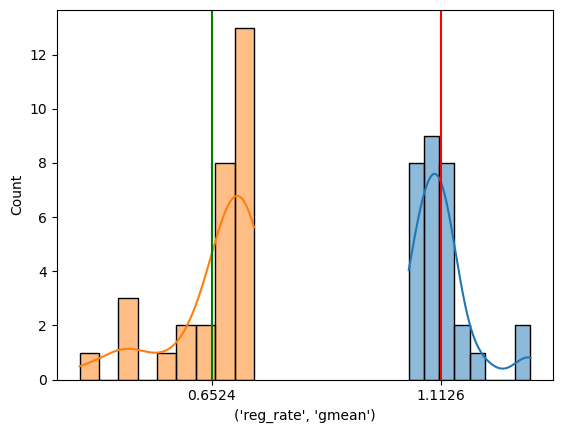

In [124]:
sns.histplot(data=top_30, x=("reg_rate", "gmean"), kde=True)
plt.axvline(stats.gmean(top_30["reg_rate"]["gmean"]), color="r")
# plt.xticks([np.median(top_30["reg_rate"]["mean"])])
# plt.xticks([stats.gmean(top_30["reg_rate"]["gmean"])])

sns.histplot(data=bottom_30, x=("reg_rate", "gmean"), kde=True)
plt.axvline(stats.gmean(bottom_30["reg_rate"]["gmean"]), color="g")
# plt.xticks([np.median(bottom_30["reg_rate"]["mean"])])
plt.xticks([stats.gmean(top_30["reg_rate"]["gmean"]), stats.gmean(bottom_30["reg_rate"]["gmean"])])

plt.show()

# ÌïòÏúÑ 30%Îäî Î≥∏Ïù∏Ïùò ÏÑ±Ìñ•Ïùò 65%Îßå Ï†êÏàòÎ•º ÏïàÏ§¨Îã§
# ÏÉÅÏúÑ 30%Îäî Î≥∏Ïù∏Ïùò ÏÑ±Ìñ•Ïùò 11%Îßå Ï†êÏàòÎ•º ÎçîÏ§¨Îã§
# -> ÌïòÏúÑ 30%Í∞Ä Î≥∏Ïù∏Ïùò ÏÑ±Ìñ•Ïóê ÎπÑÌï¥ ÎßåÏ°±ÎèÑÍ∞Ä Îçî ÎÇÆÎã§
# => ÎßåÏ°±ÎèÑÏóê ÏûàÏñ¥, Î∂àÎßåÏ°±Ìïú Î∂ÄÎ∂ÑÏù¥ ÌèâÍ∑†ÌèâÏ†êÏóê Î∞òÏòÅÎêòÎäî Ï†ïÎèÑÍ∞Ä ÌÅ¨Îã§